In [7]:
import torch
import random

import sys
sys.path.append("../../../lib")
import utility

In [8]:
res = torch.load("../data/indirect_effect_1000_examples.pt")
res = random.sample(res, 100)

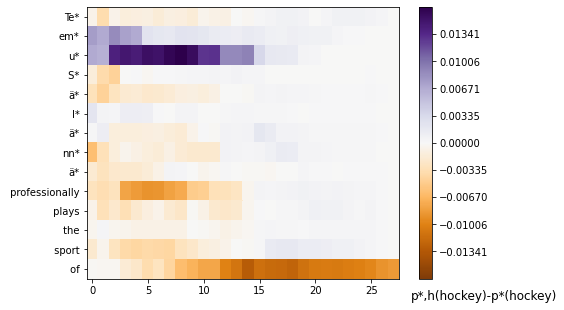

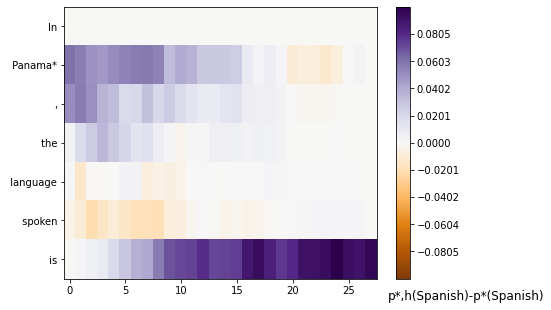

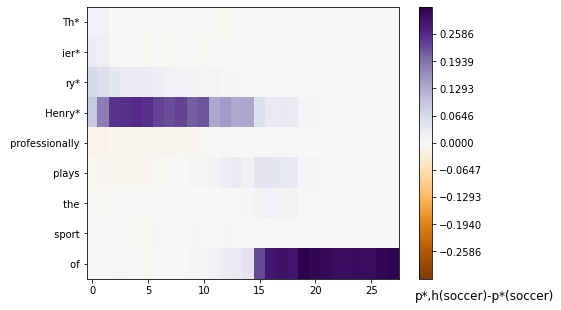

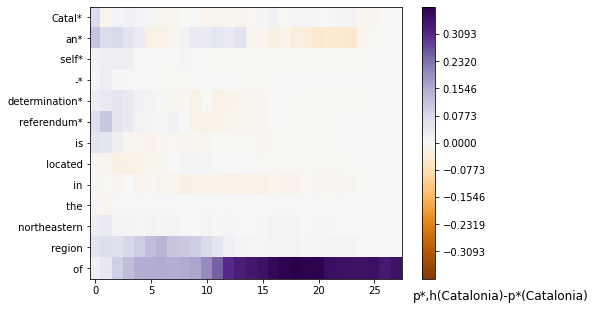

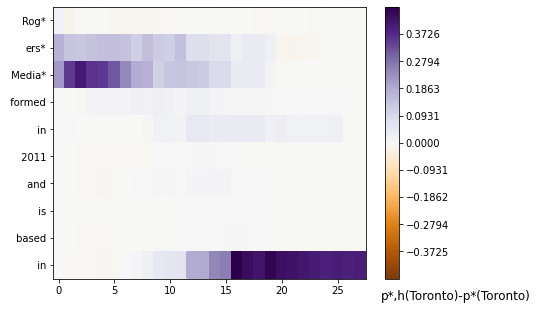

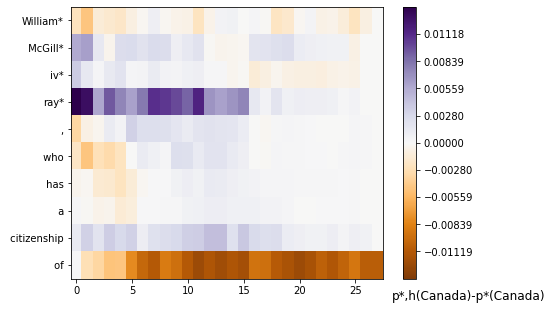

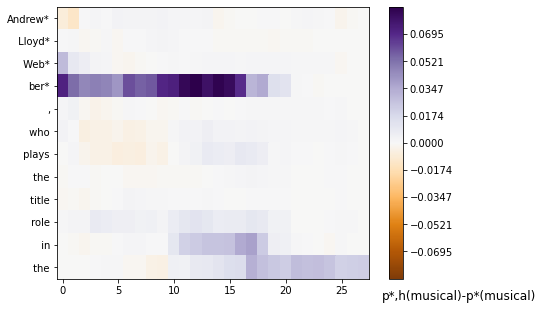

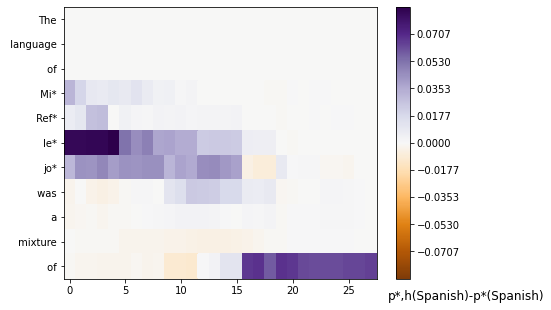

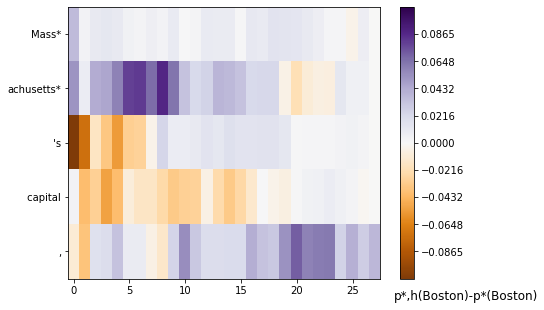

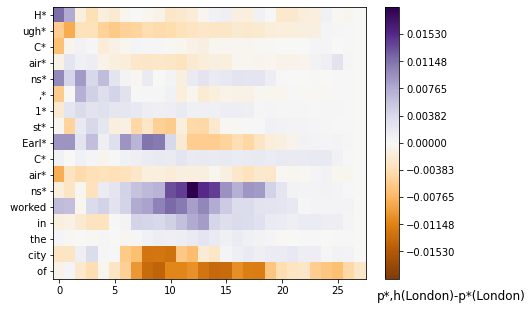

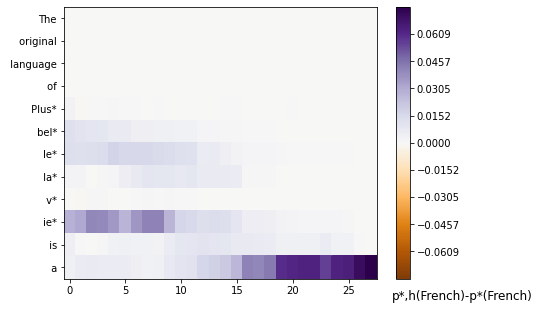

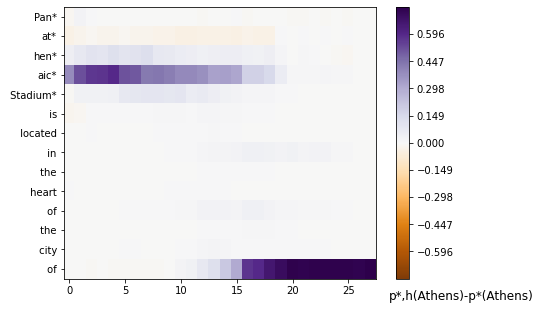

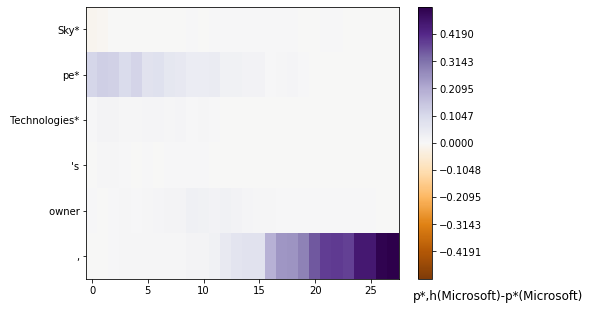

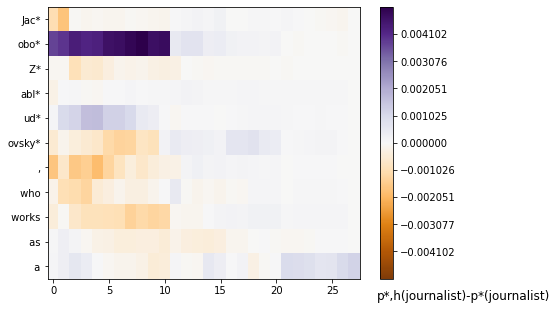

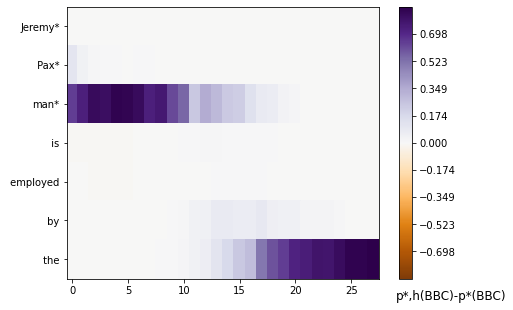

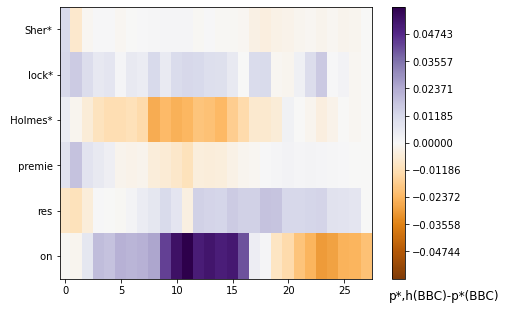

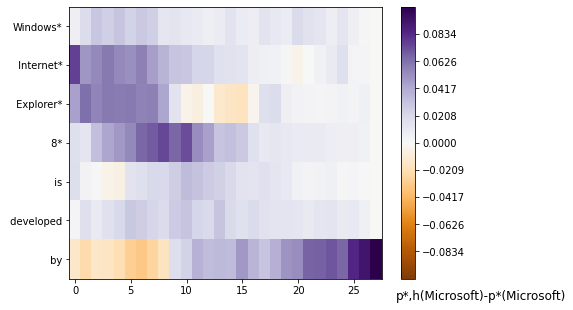

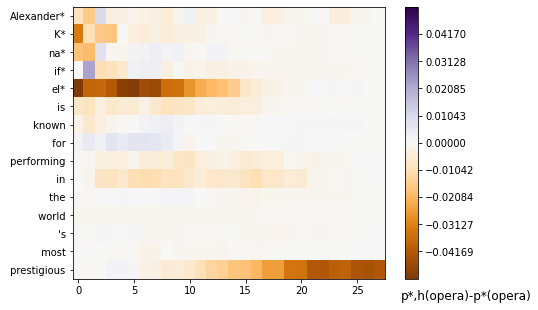

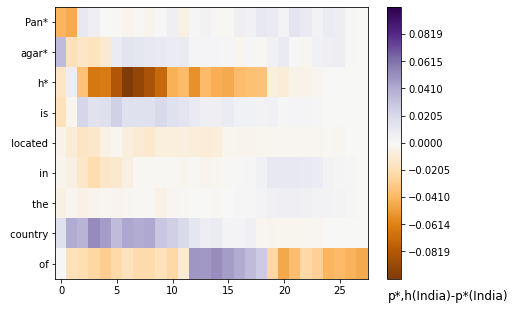

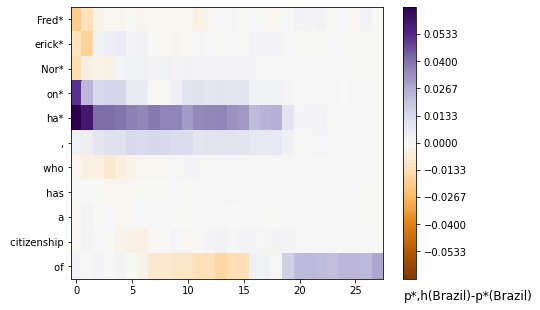

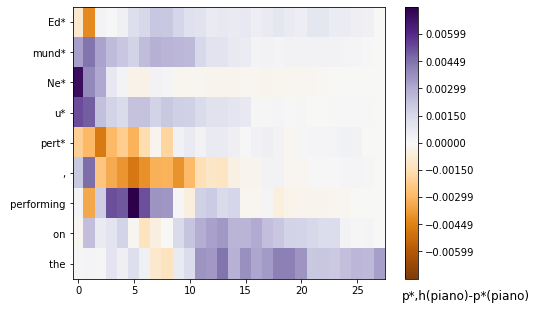

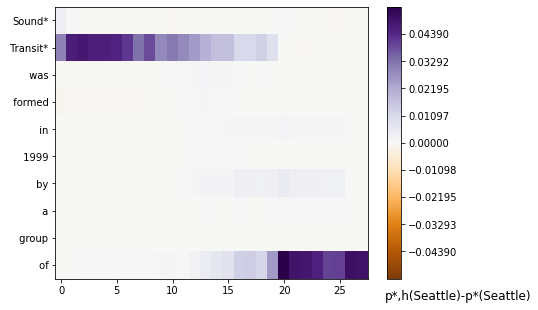

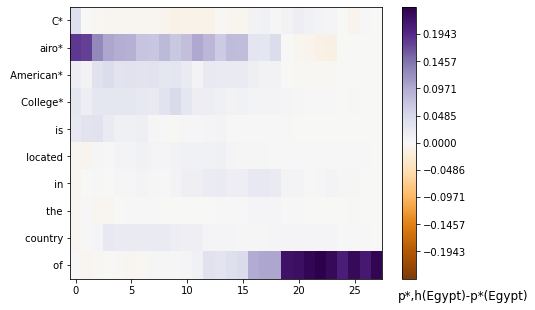

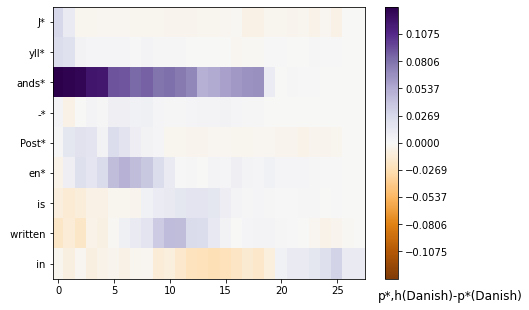

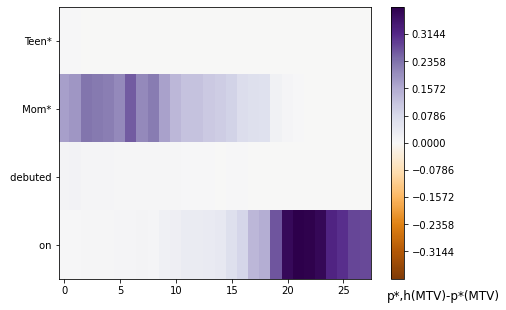

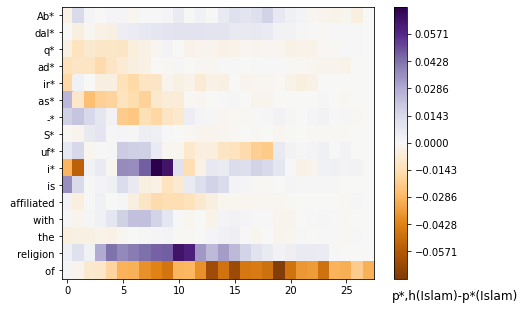

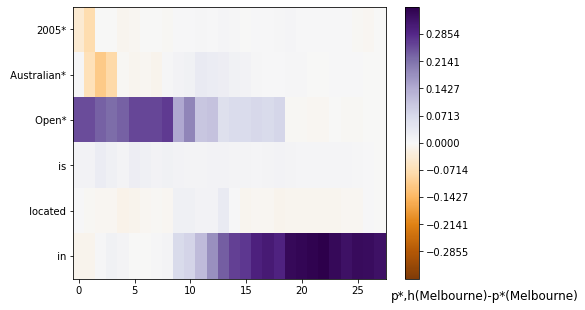

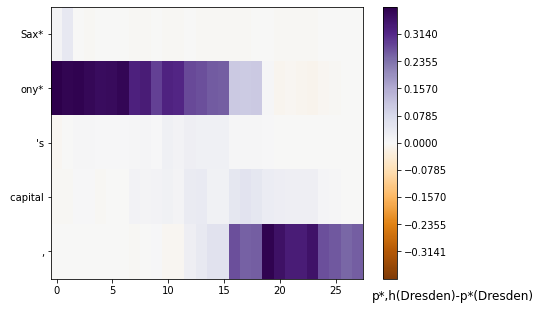

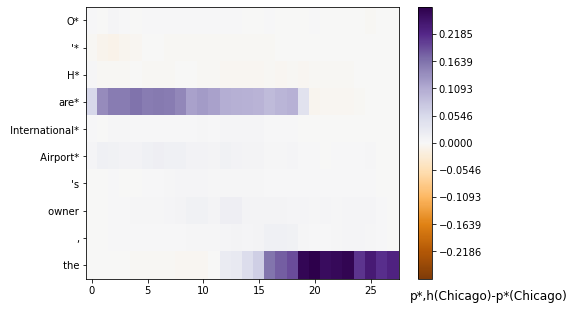

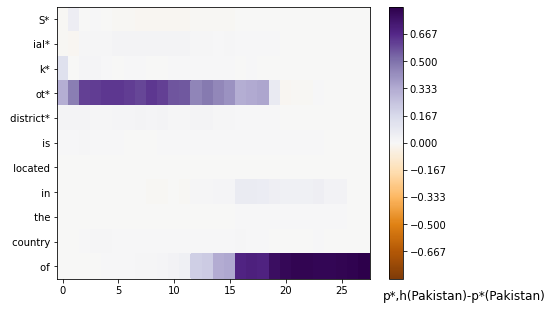

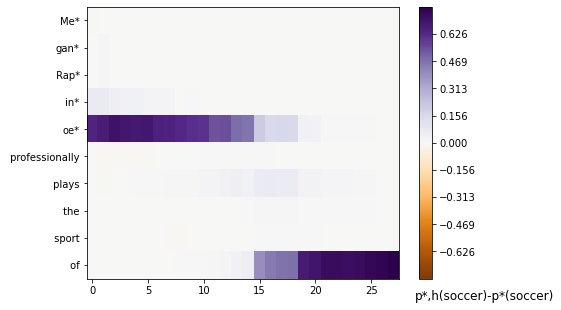

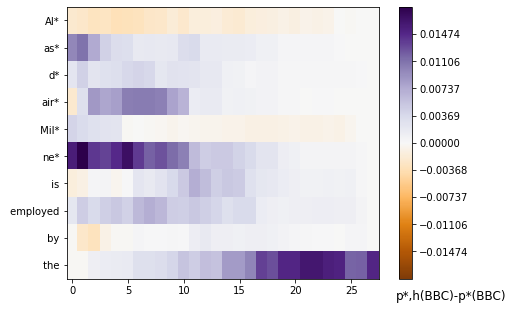

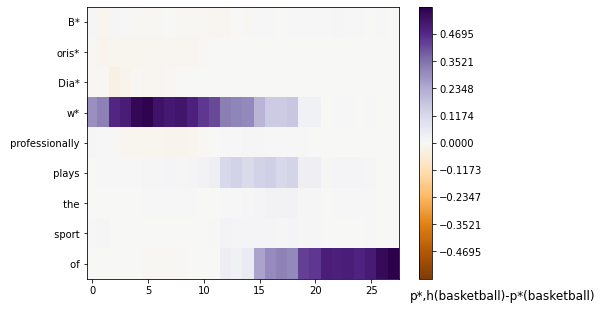

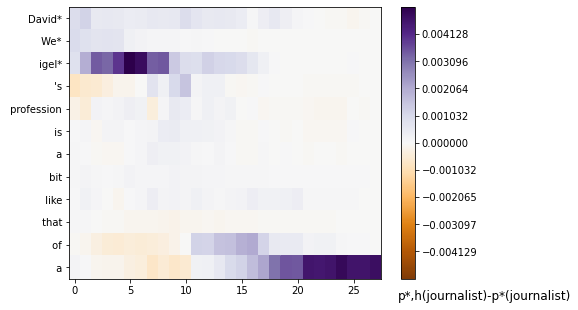

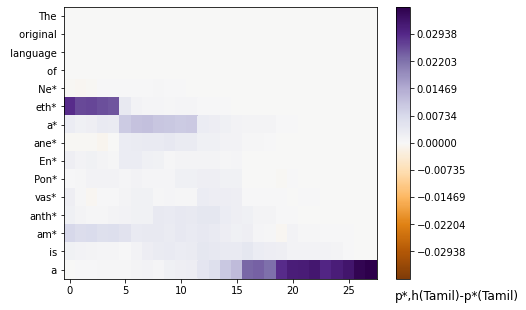

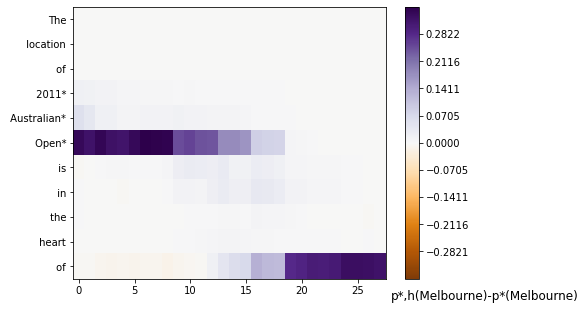

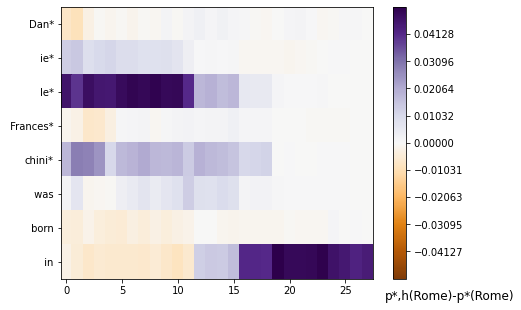

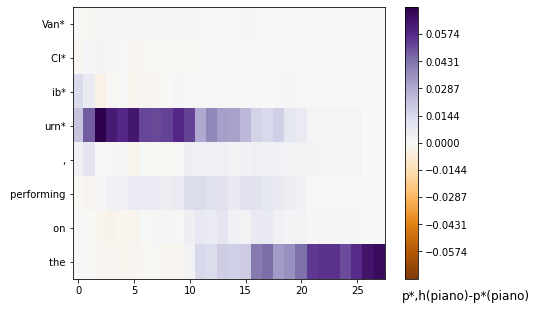

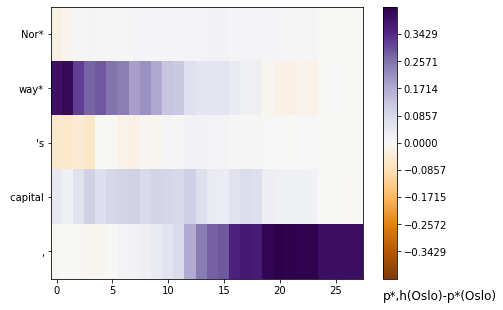

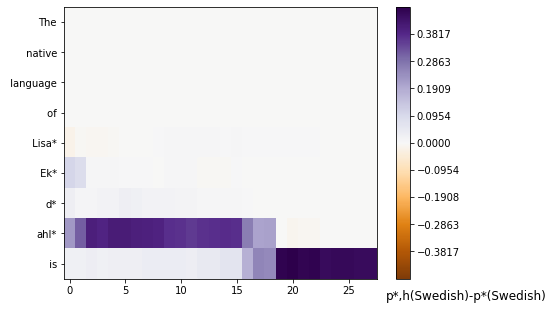

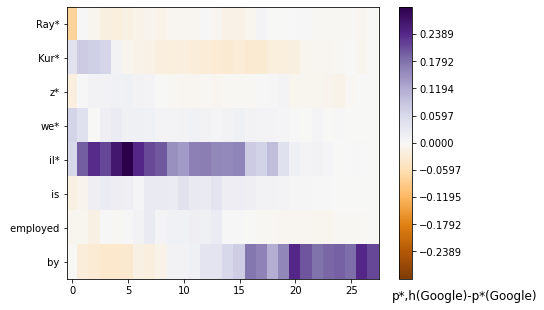

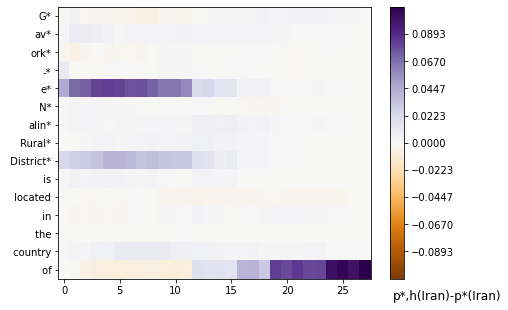

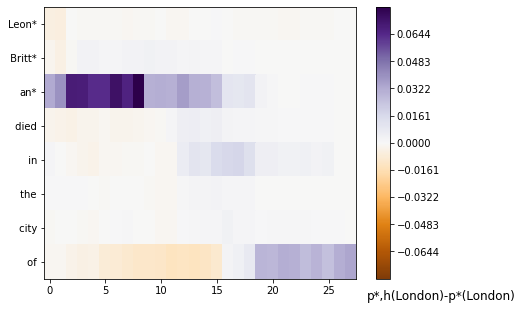

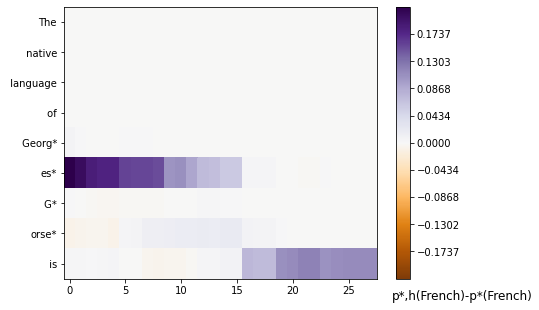

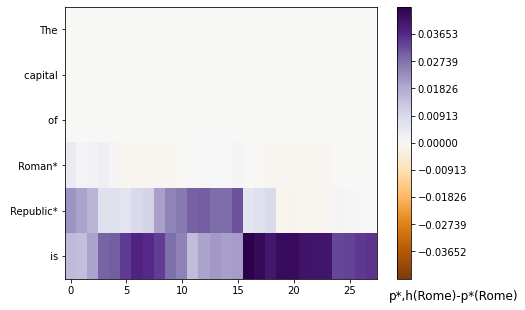

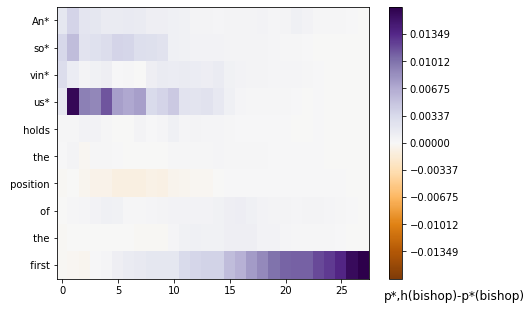

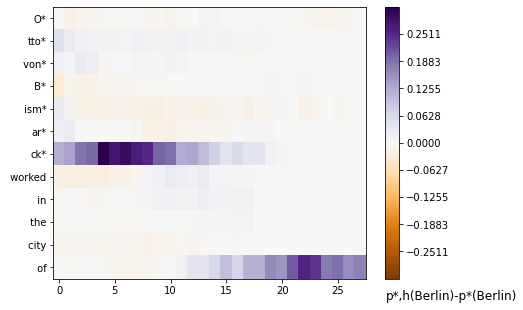

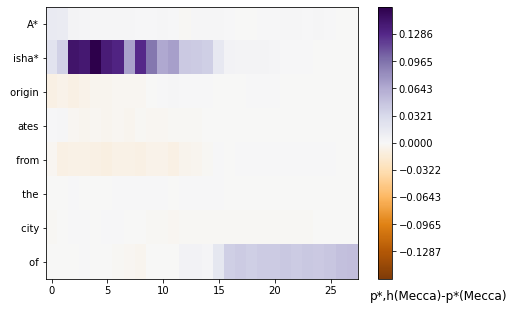

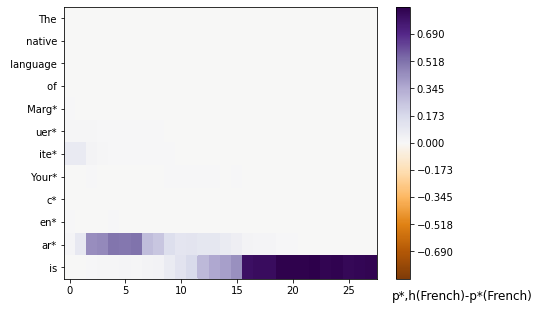

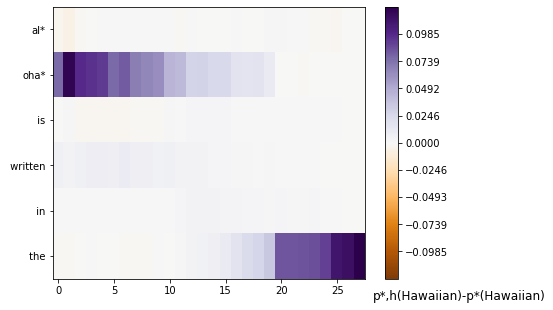

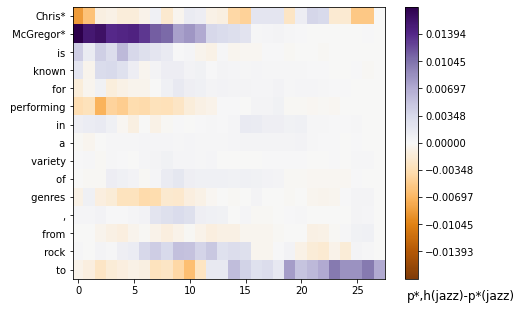

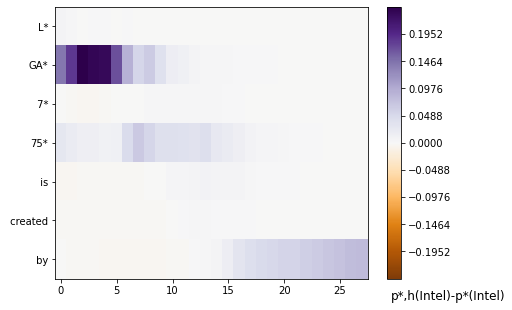

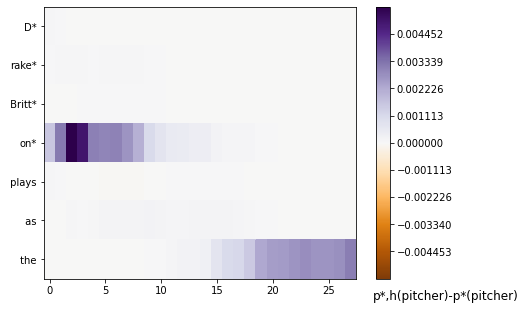

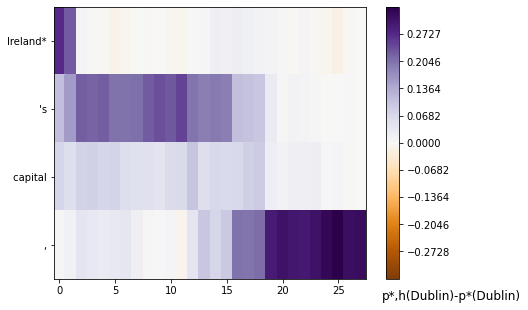

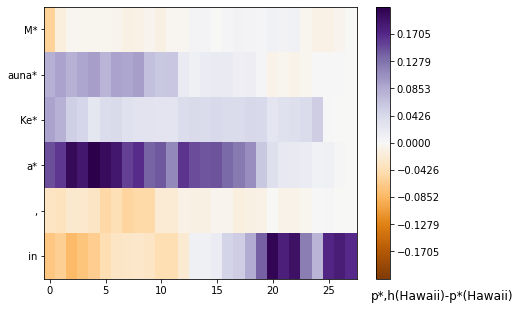

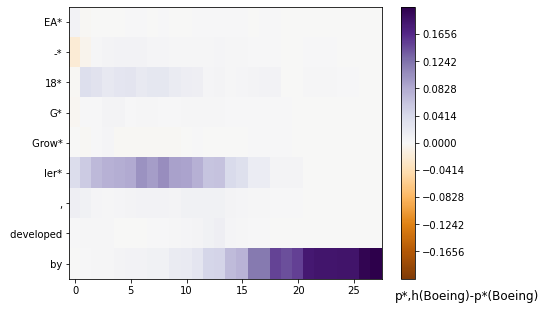

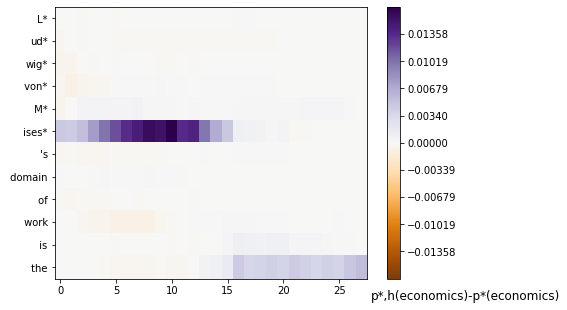

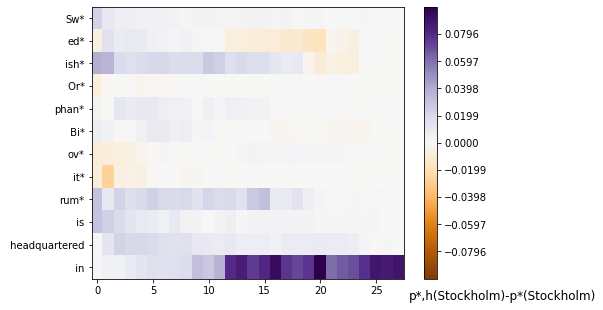

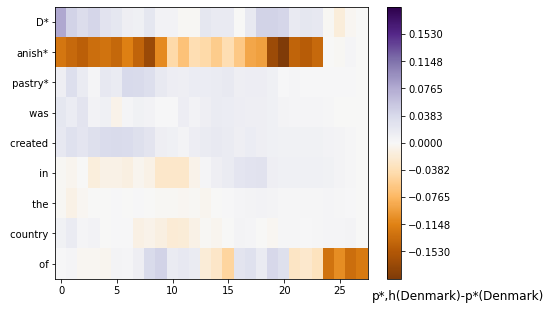

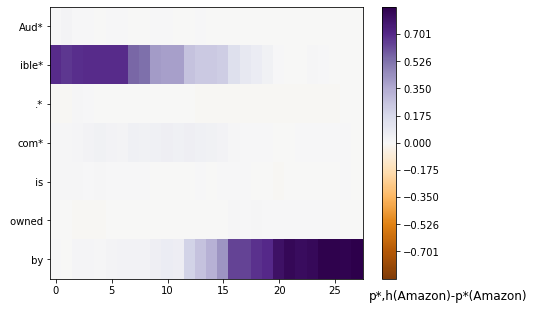

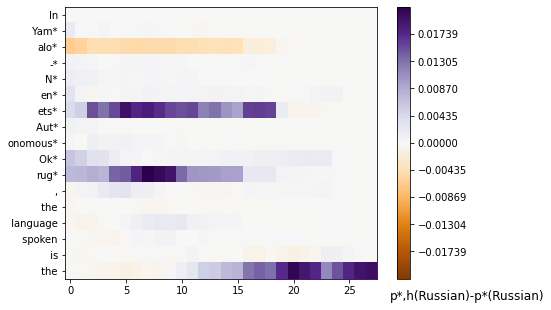

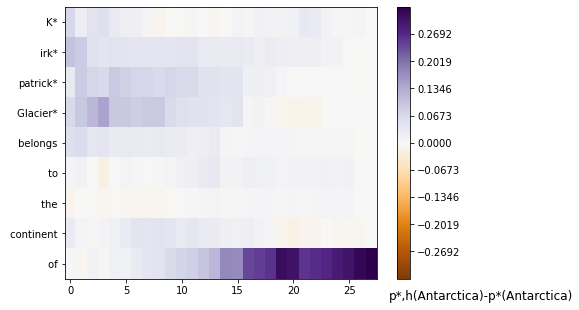

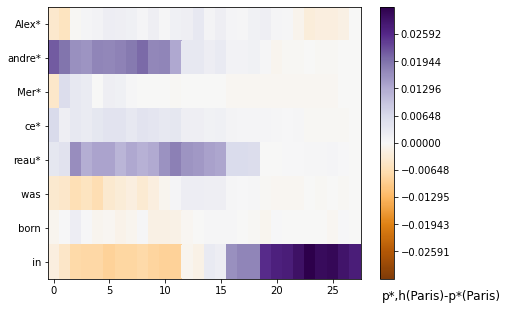

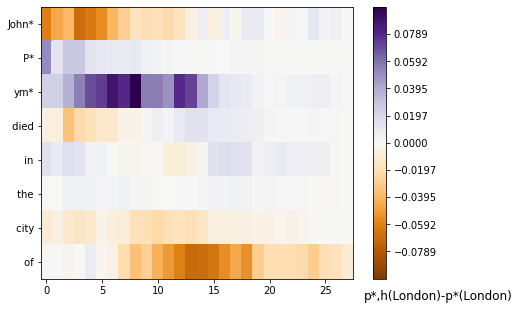

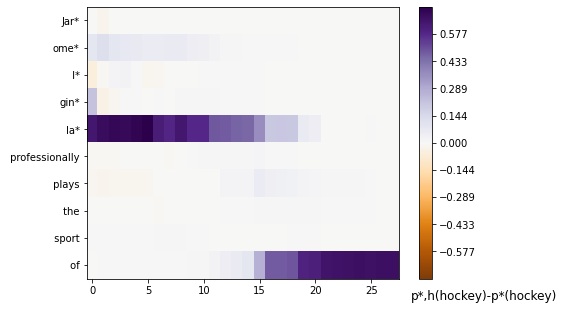

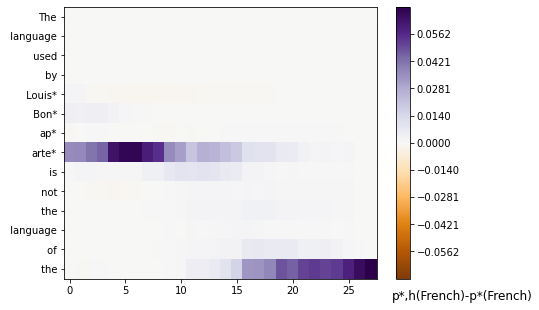

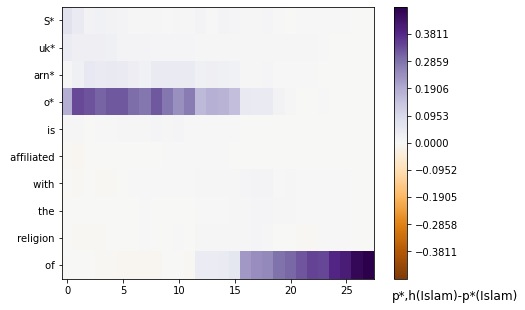

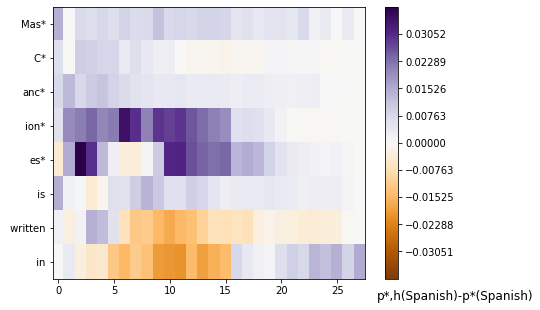

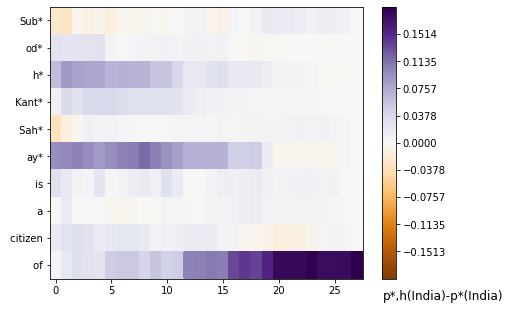

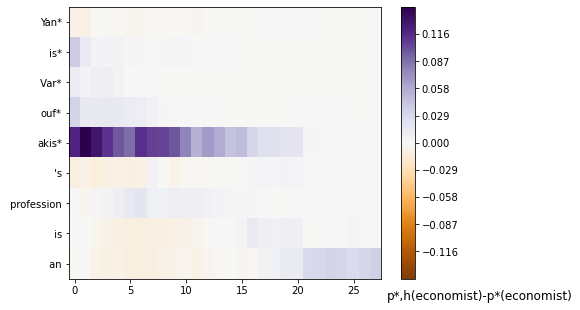

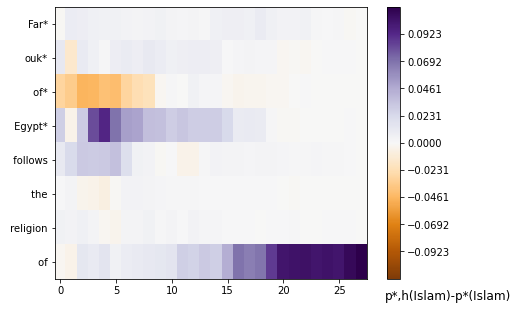

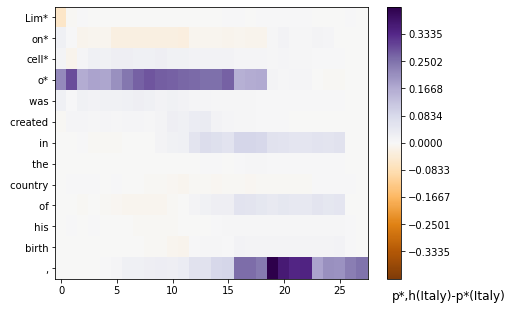

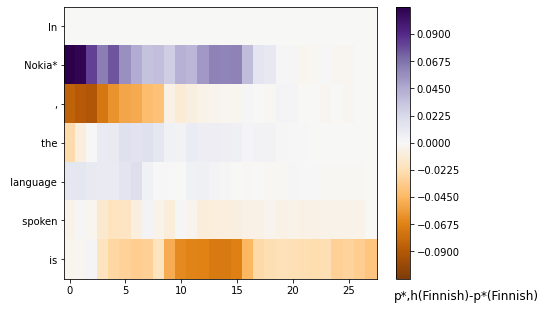

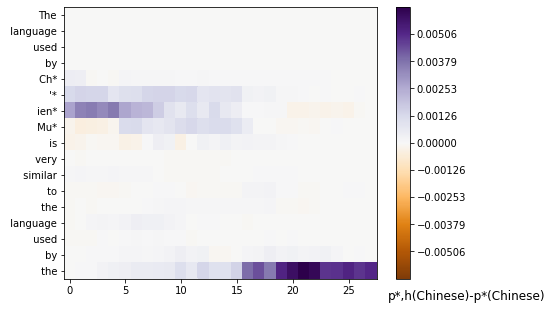

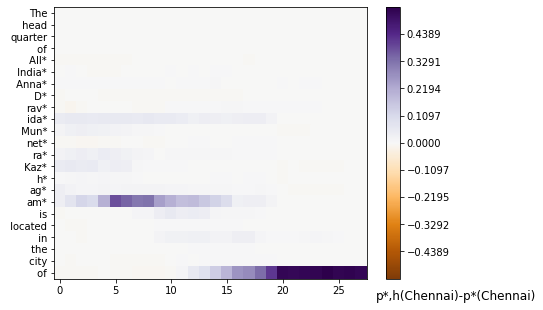

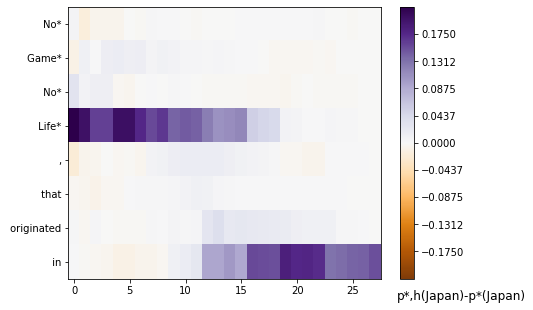

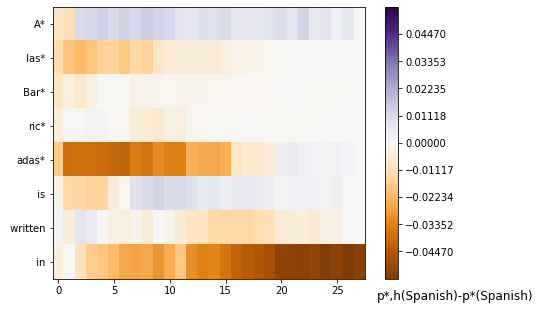

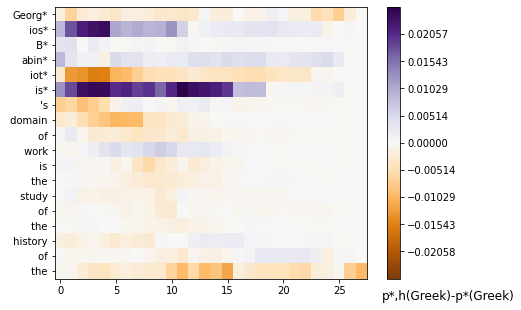

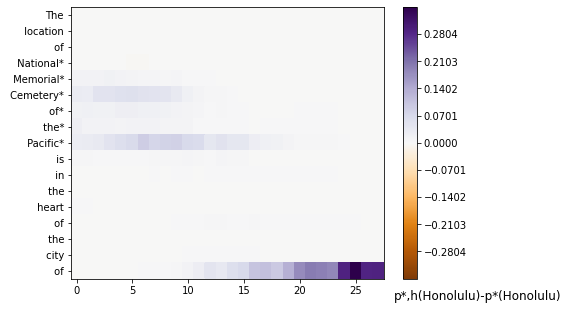

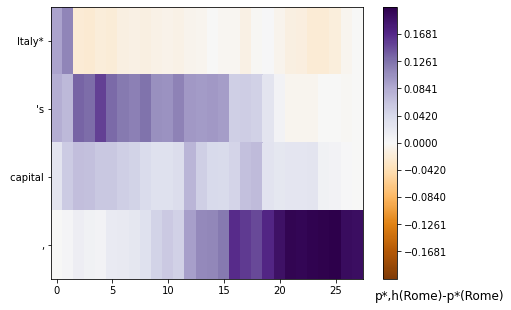

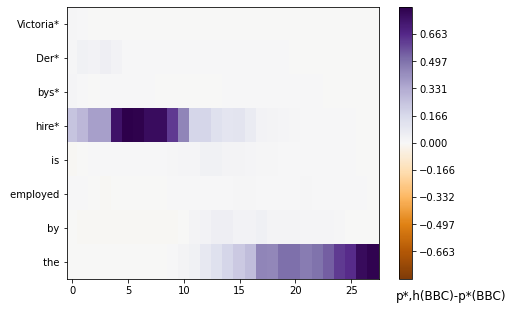

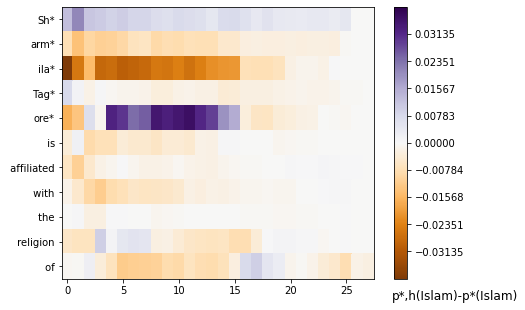

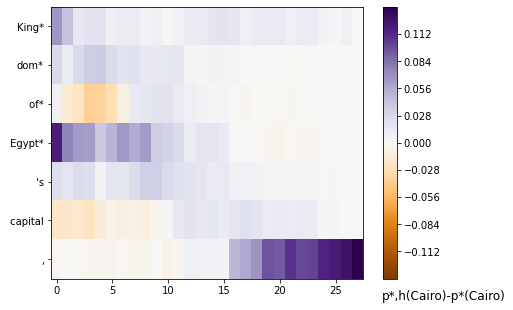

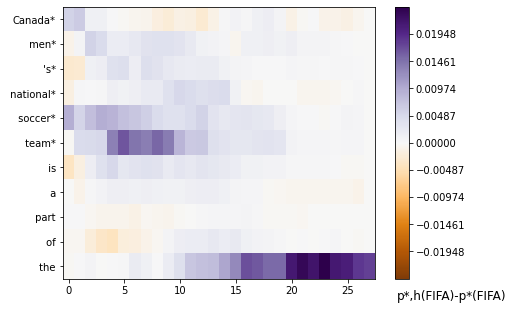

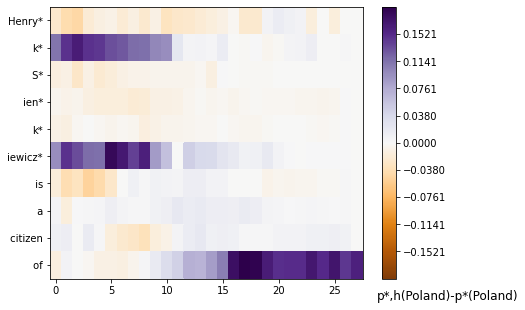

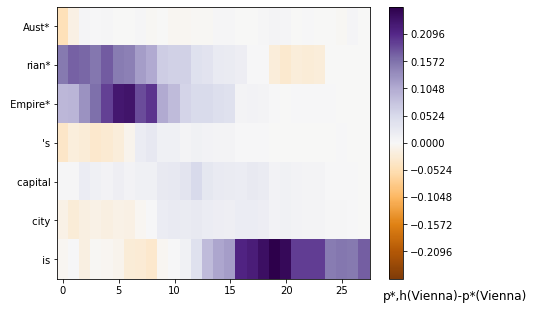

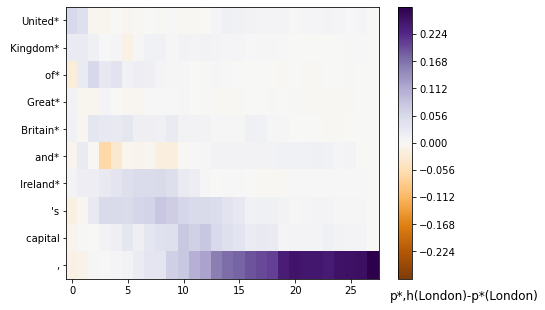

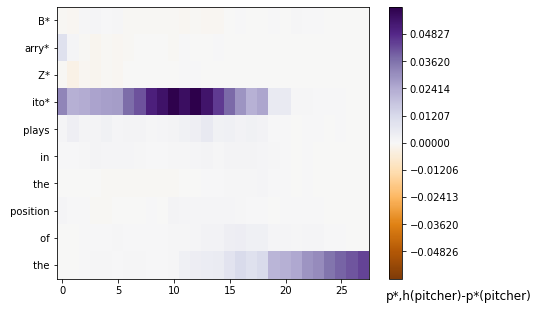

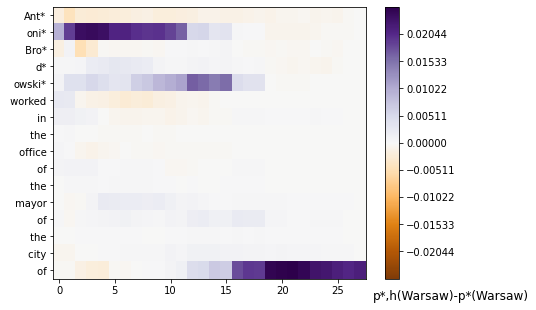

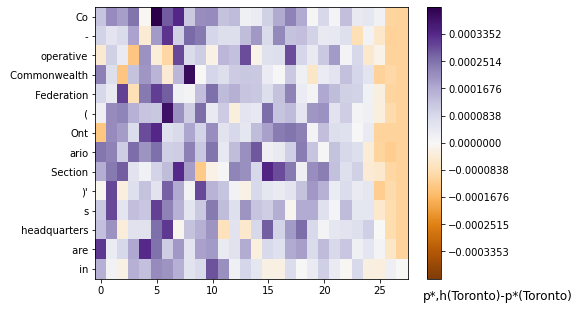

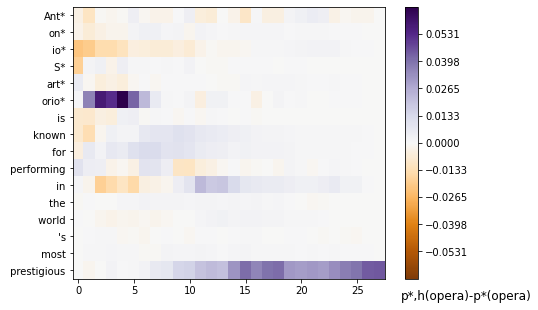

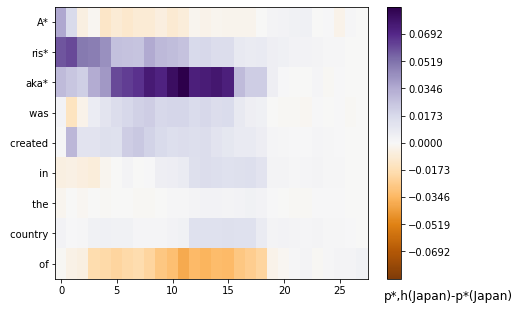

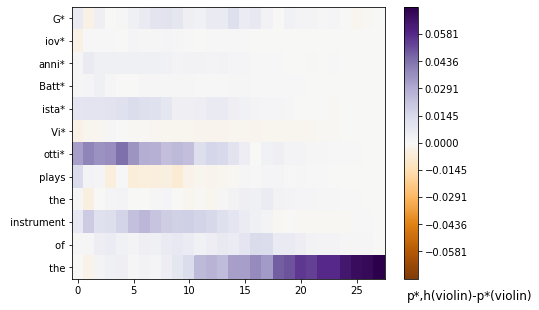

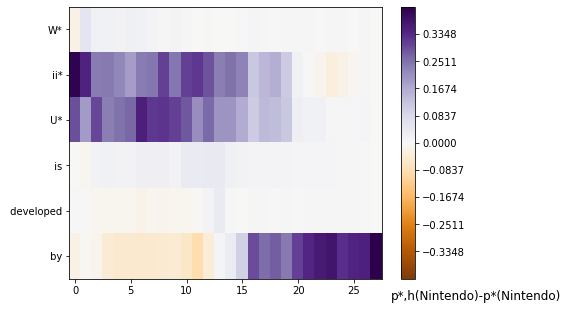

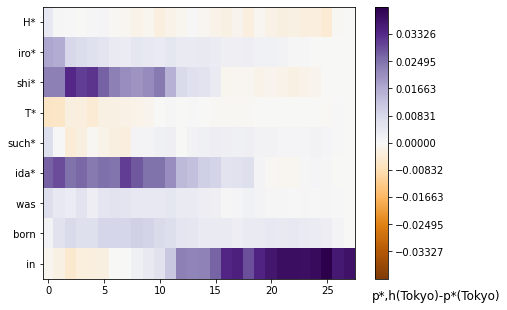

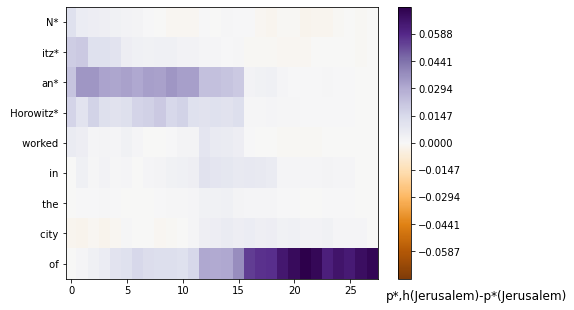

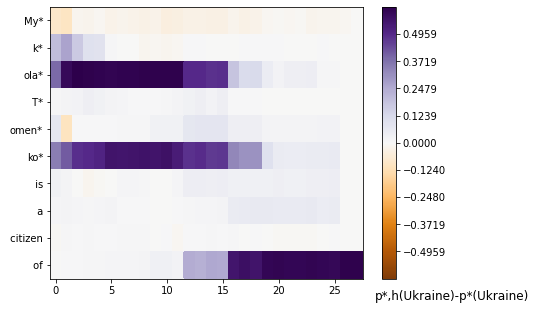

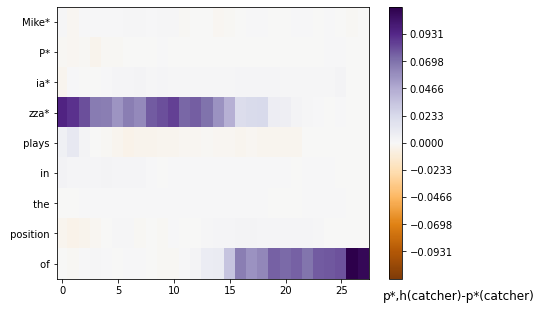

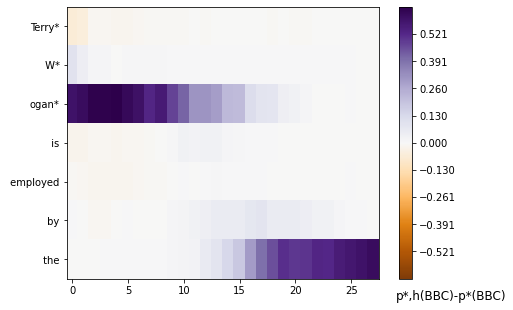

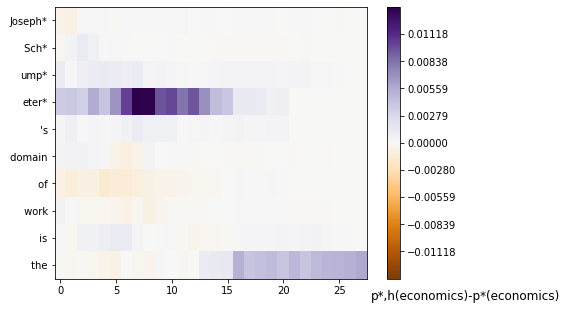

In [9]:
# no cutoff applied
for prob, access in res:
    text, tkens, num_layers, _, _ = access
    x = num_layers
    y = tkens
    bound = max(torch.max(prob).item(), abs(torch.min(prob).item()))
    incr = bound / 10000
    title = "p*,h("+text.split()[-1]+")"+"-"+"p*("+text.split()[-1]+")"
    color_schema = "PuOr"
    
    utility.plot_results(prob, x, y, -bound, bound, incr, title, color_schema)

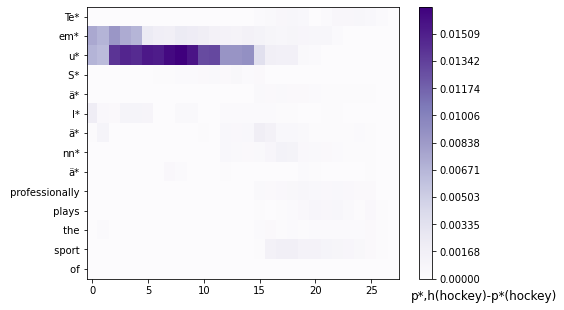

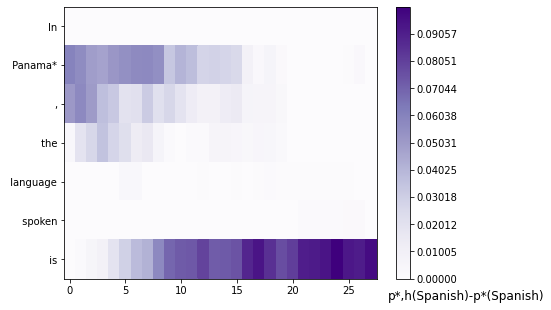

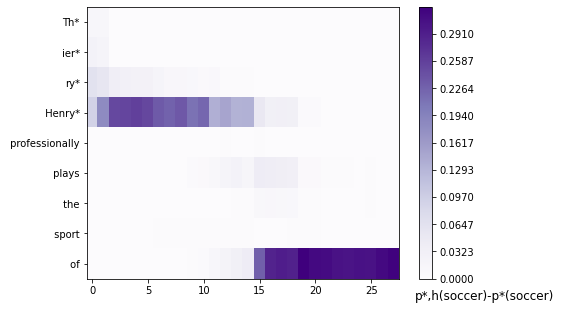

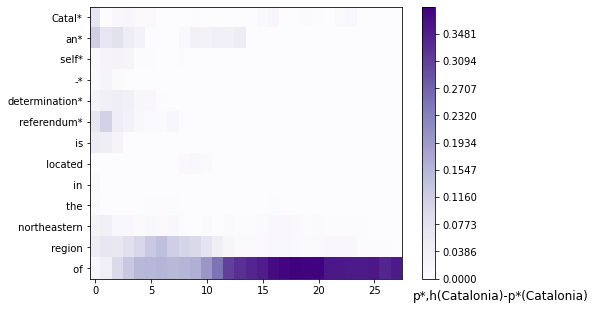

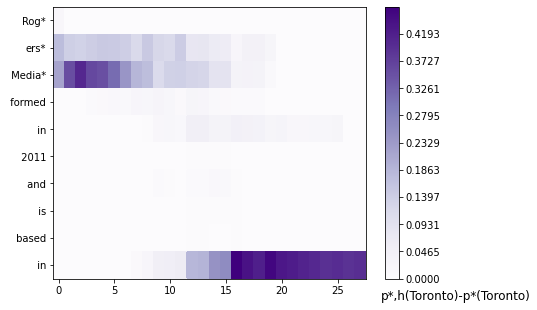

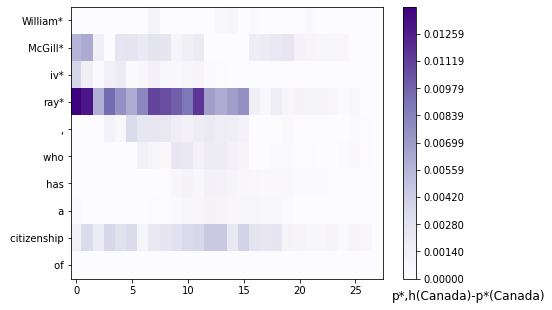

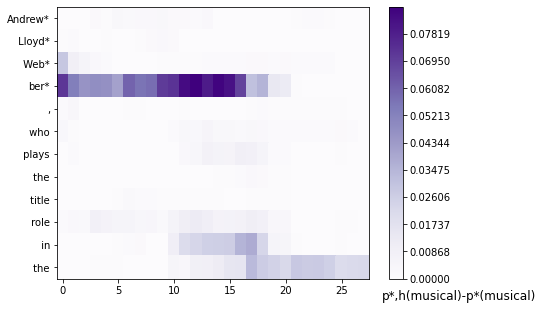

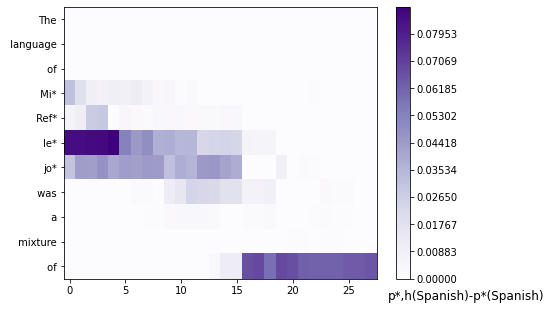

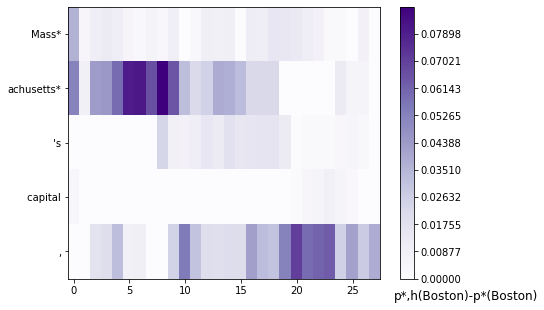

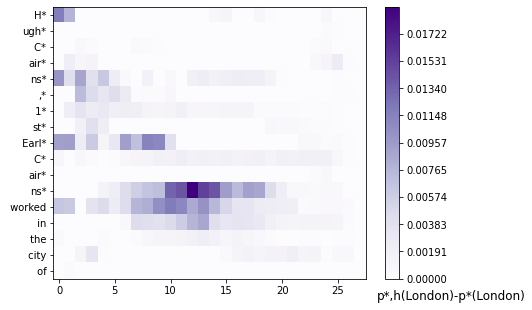

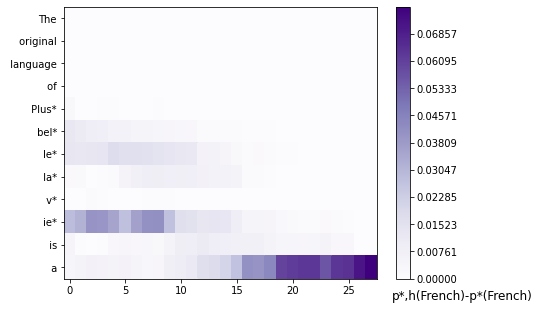

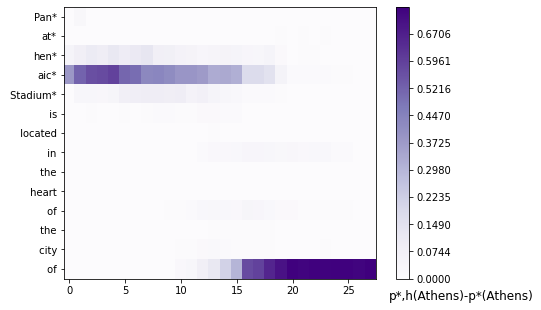

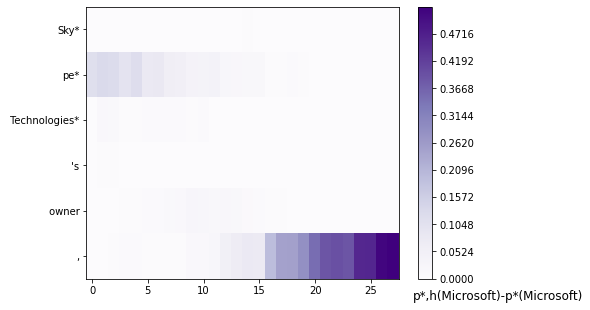

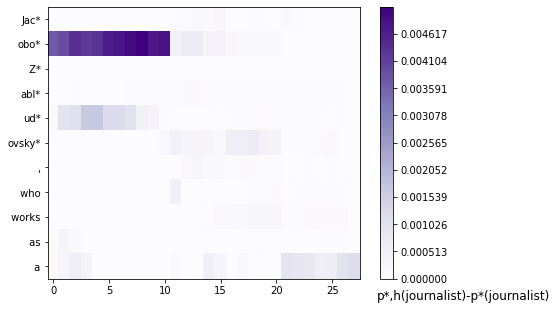

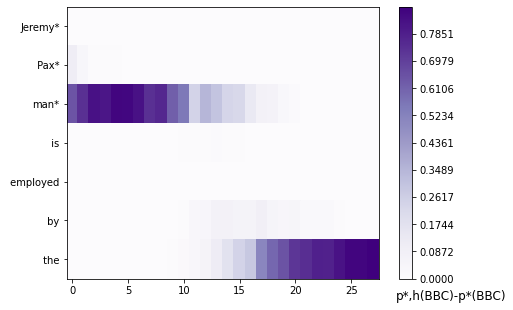

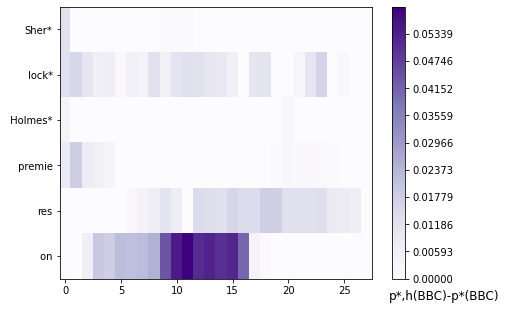

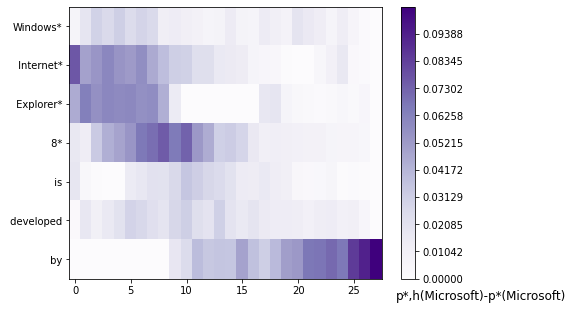

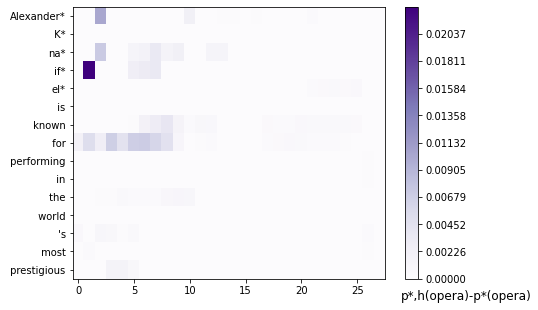

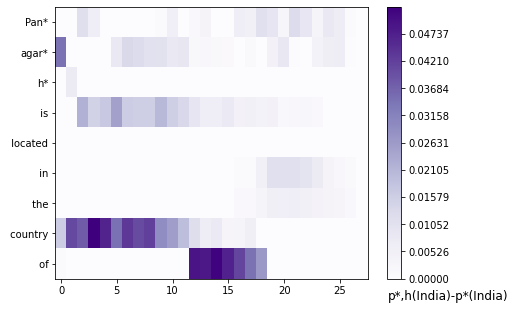

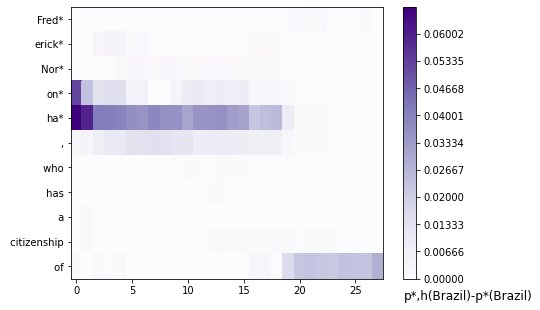

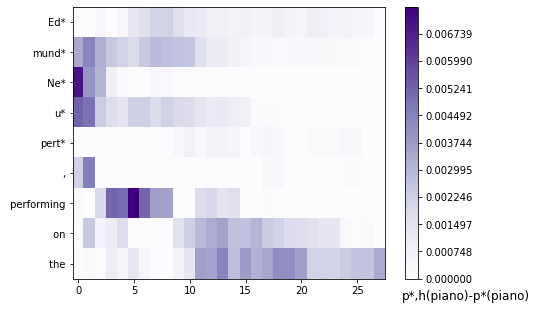

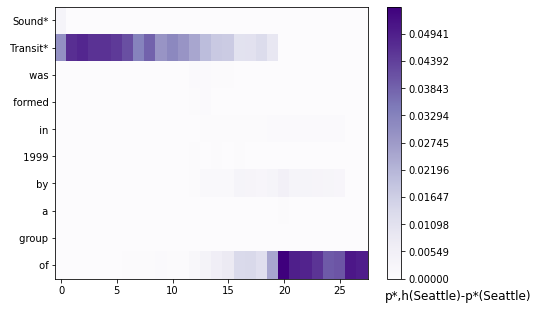

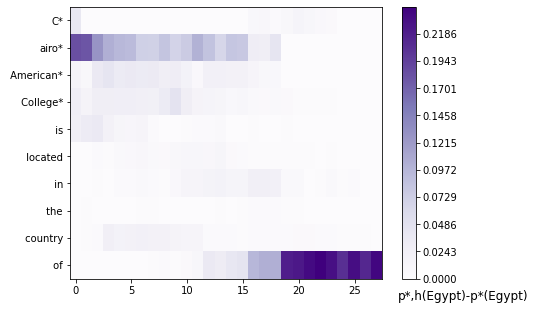

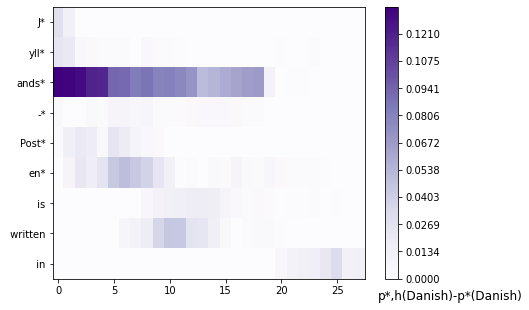

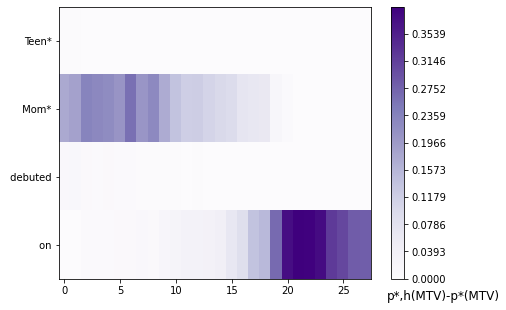

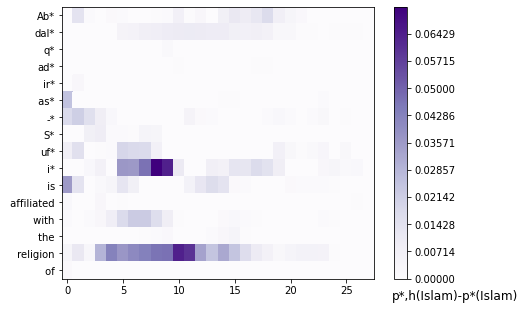

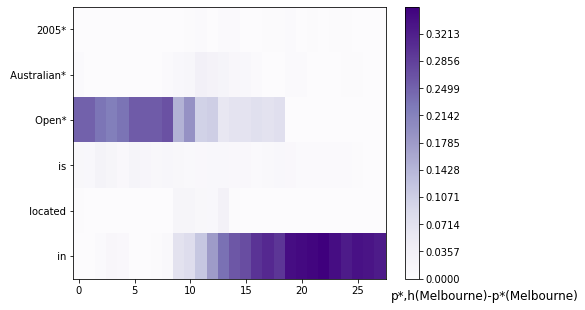

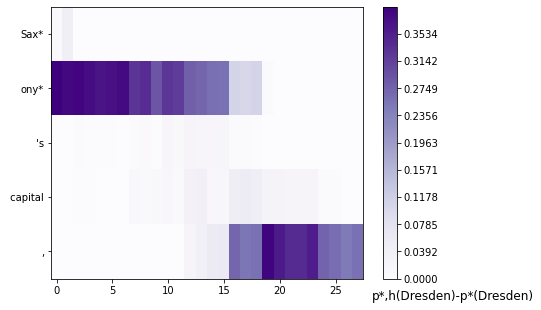

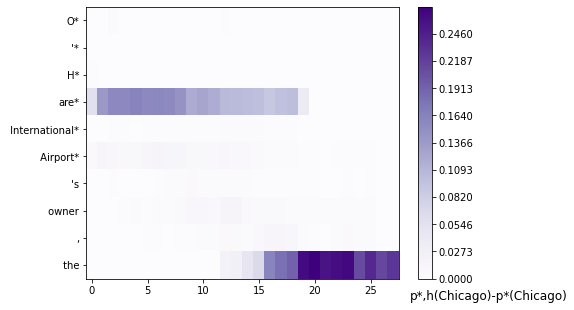

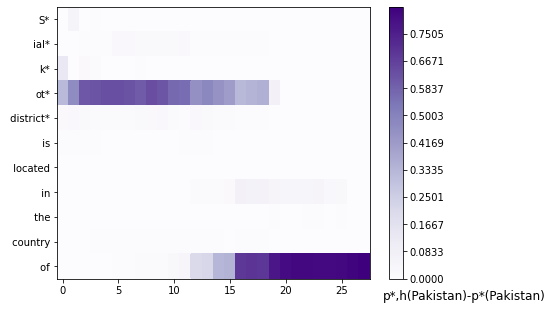

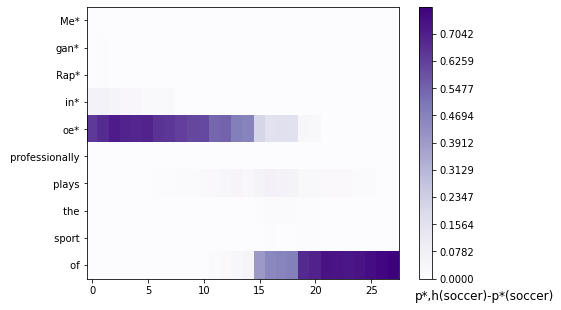

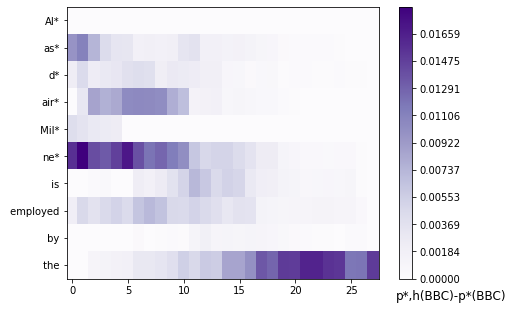

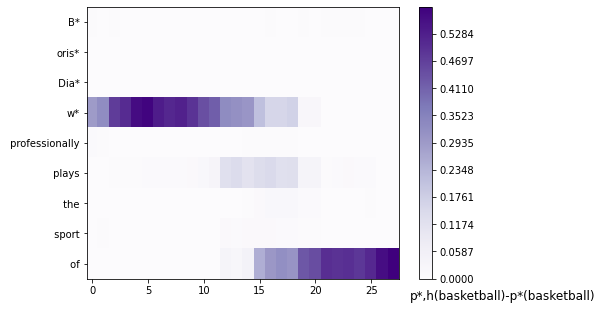

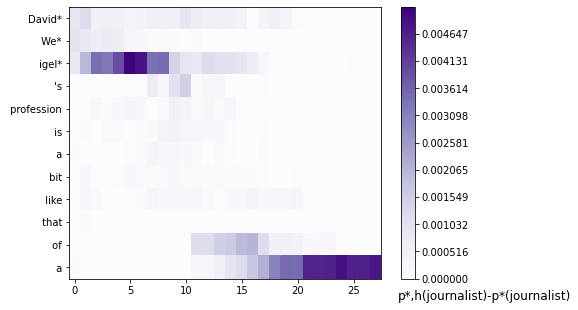

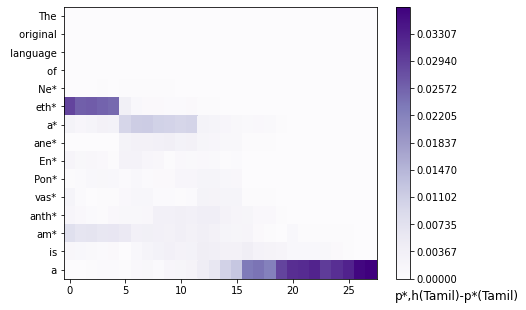

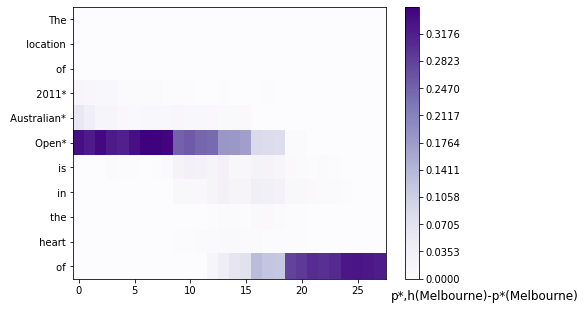

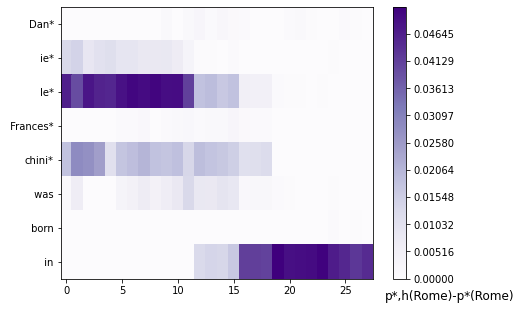

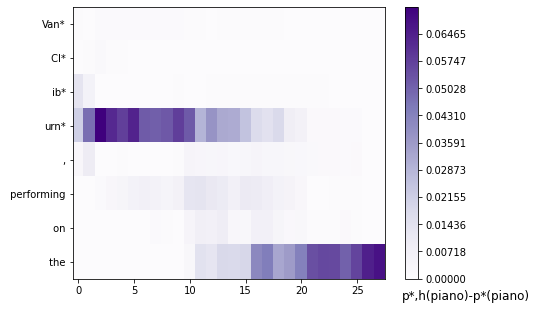

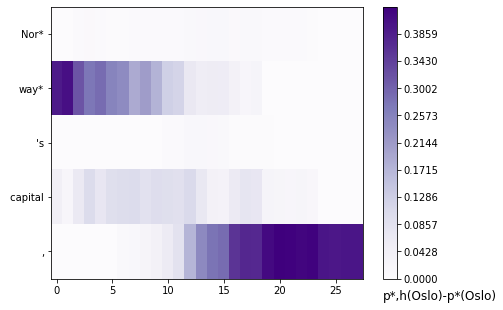

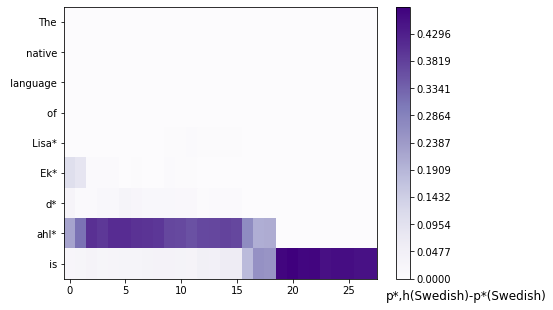

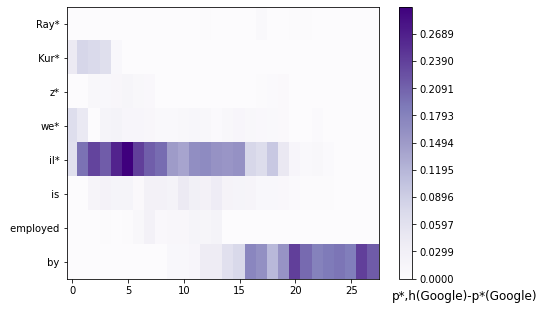

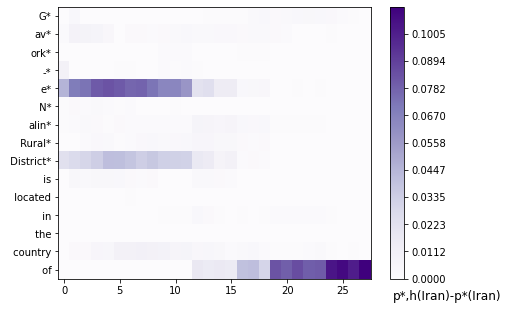

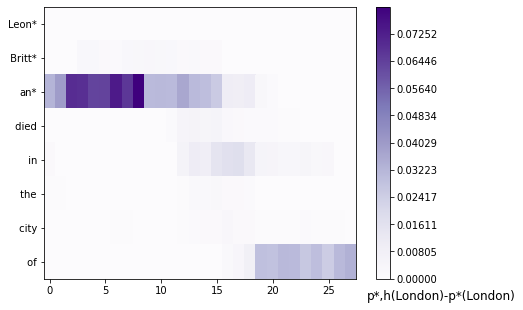

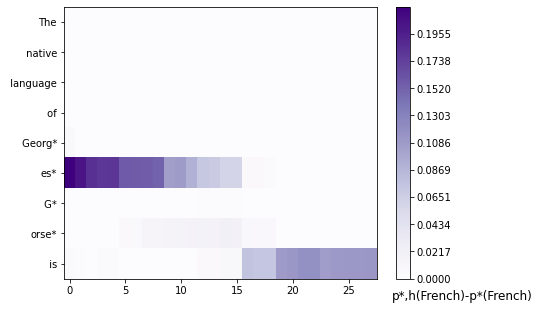

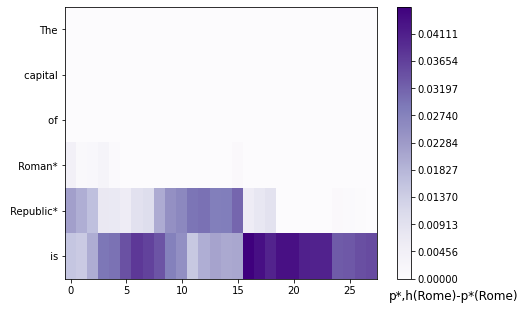

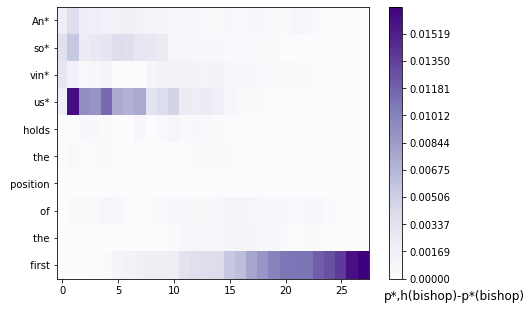

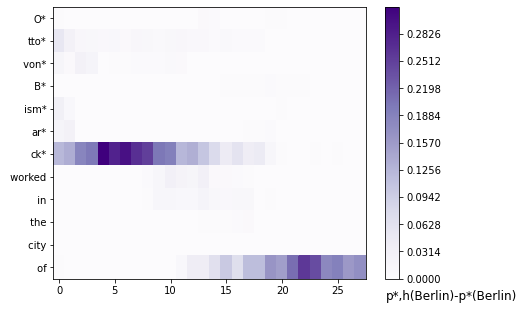

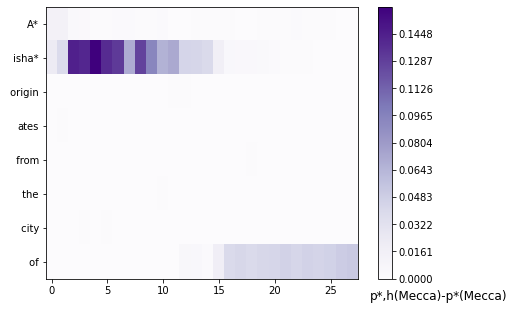

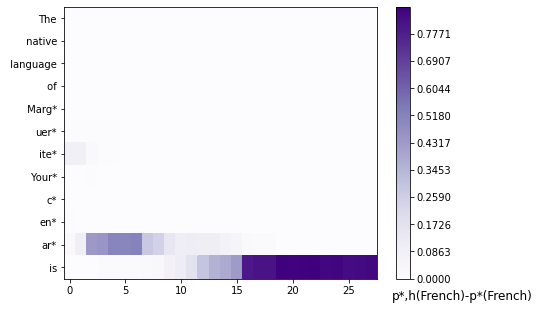

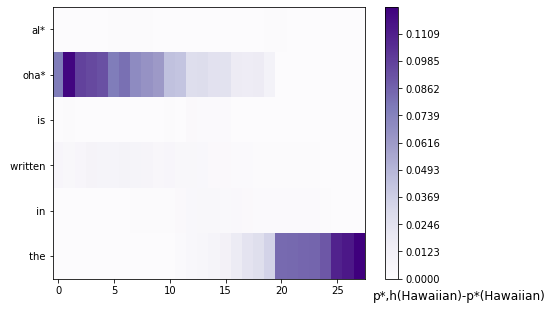

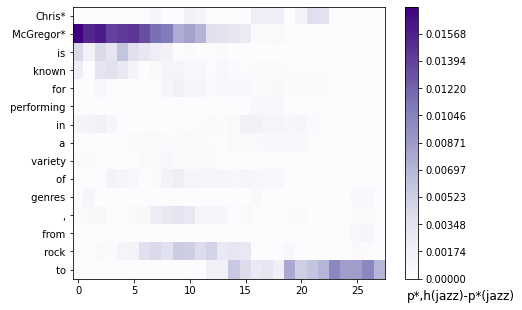

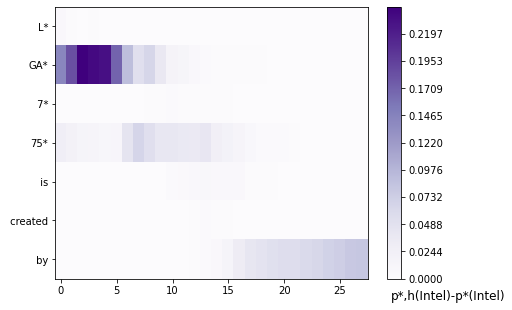

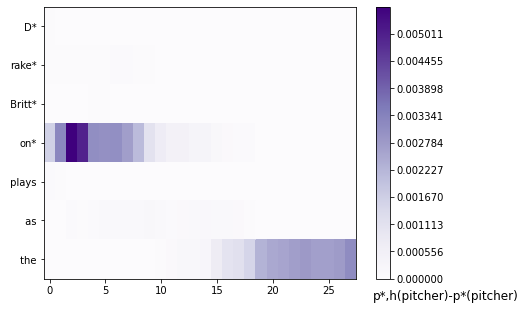

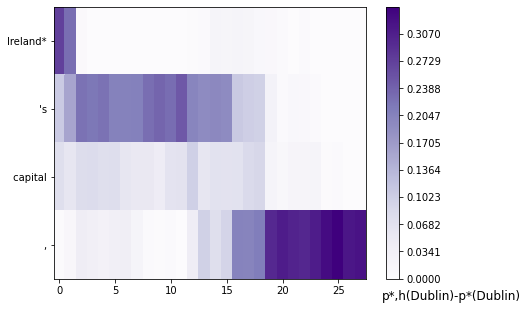

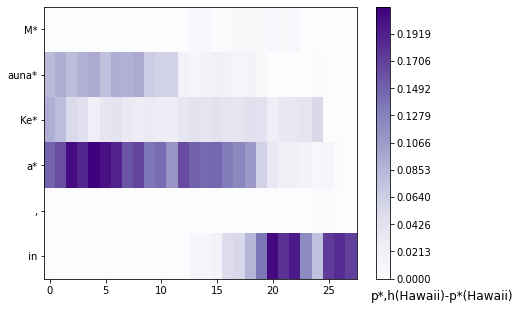

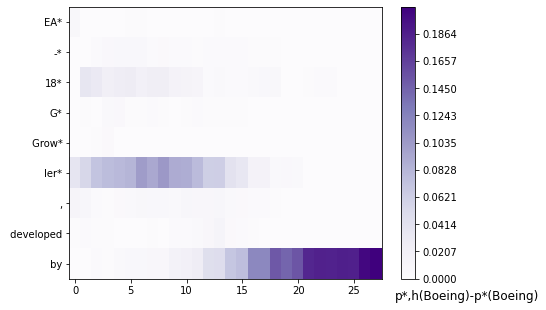

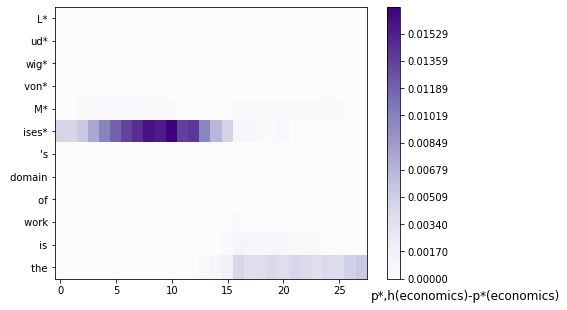

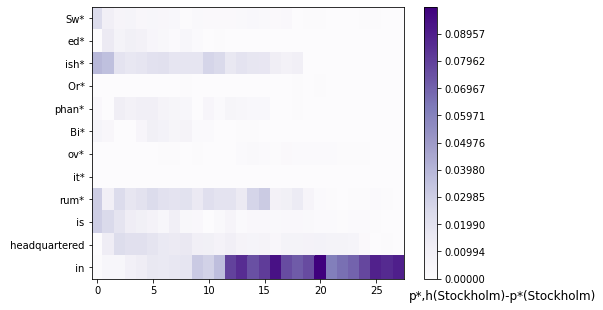

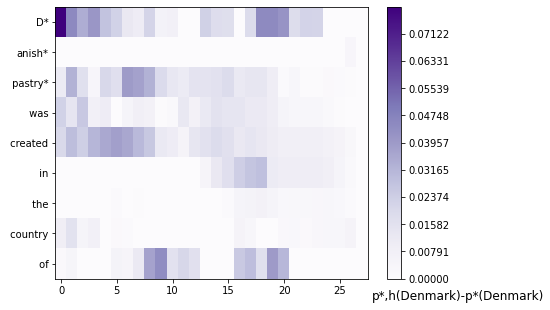

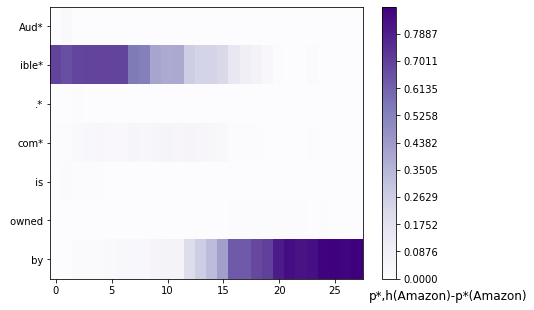

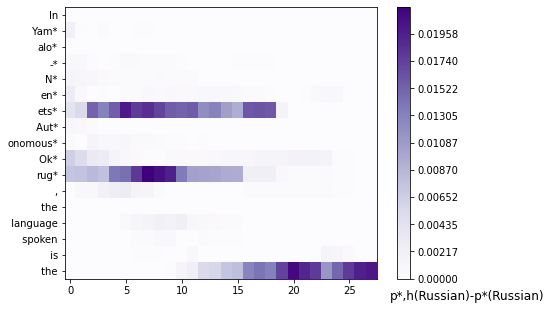

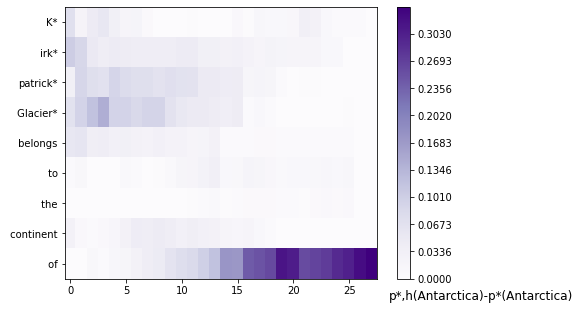

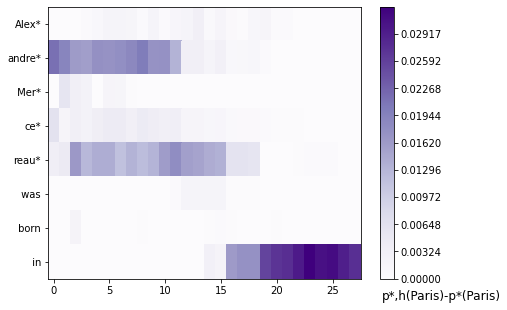

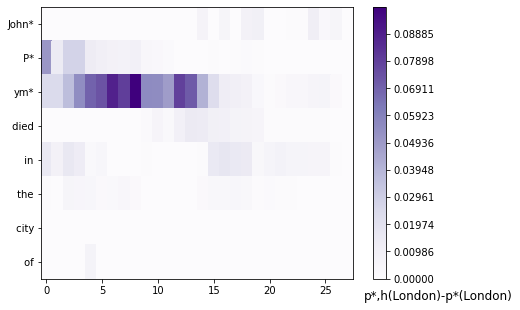

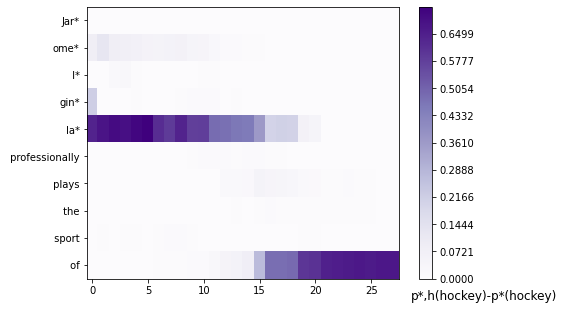

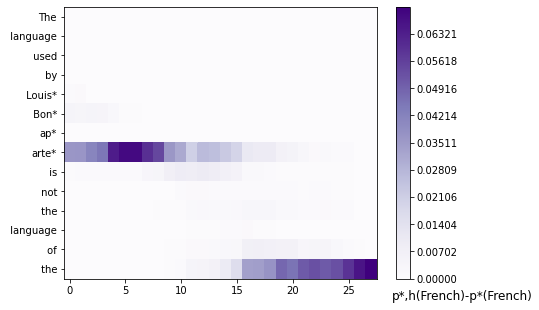

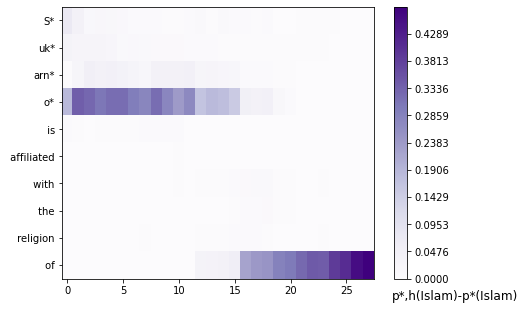

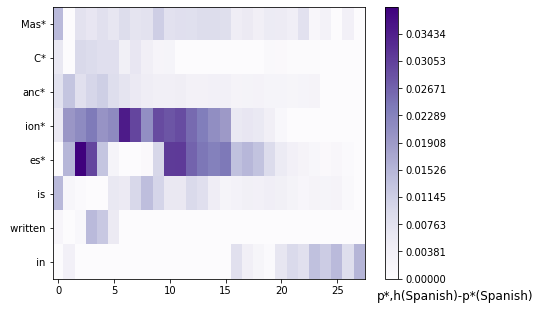

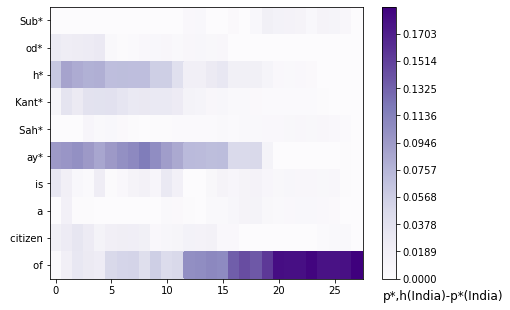

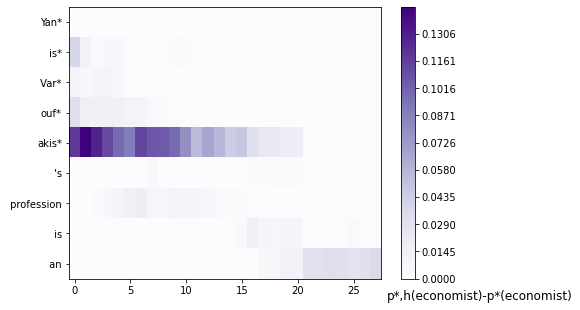

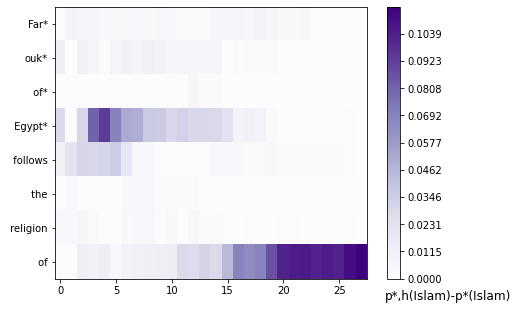

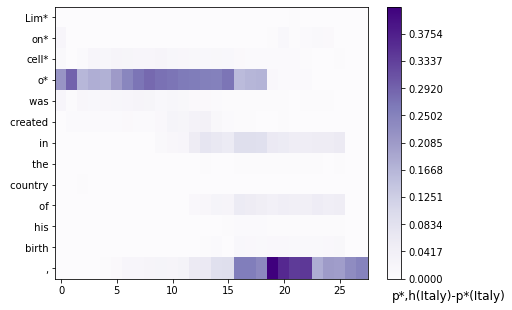

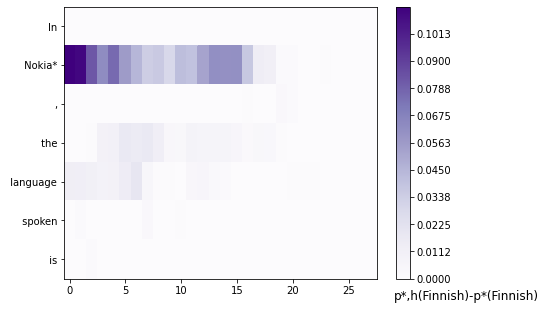

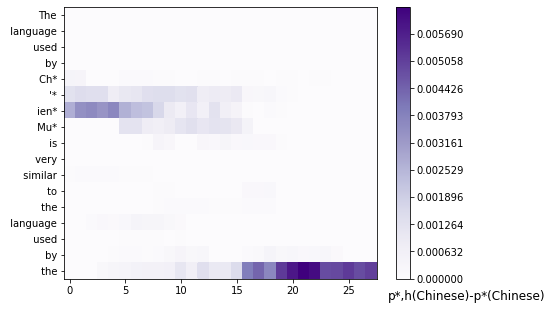

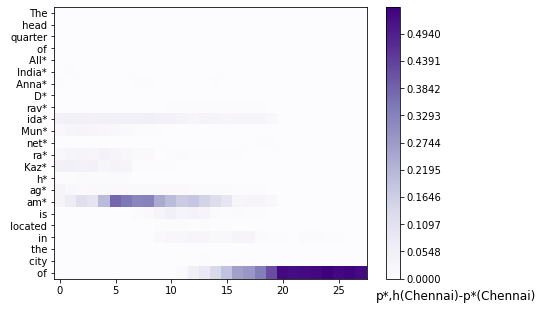

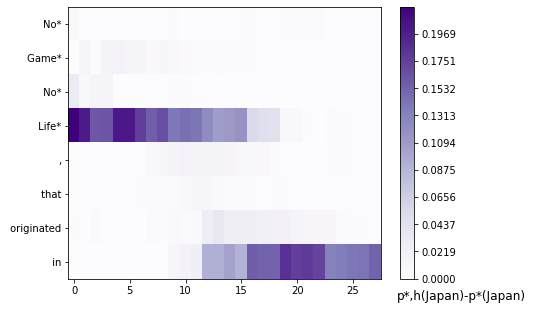

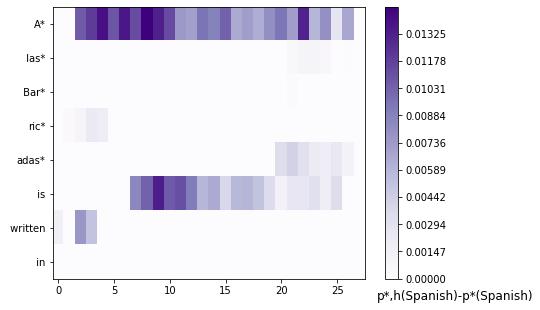

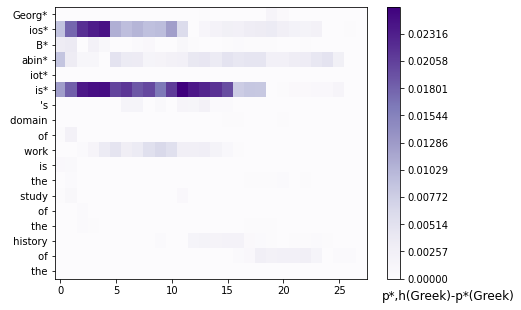

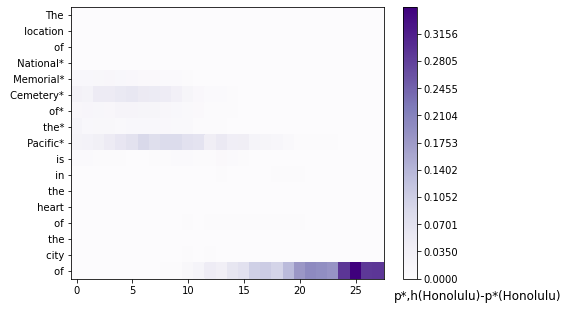

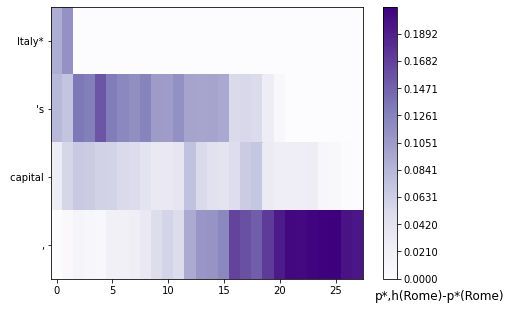

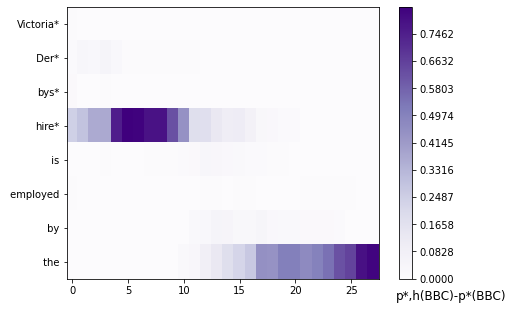

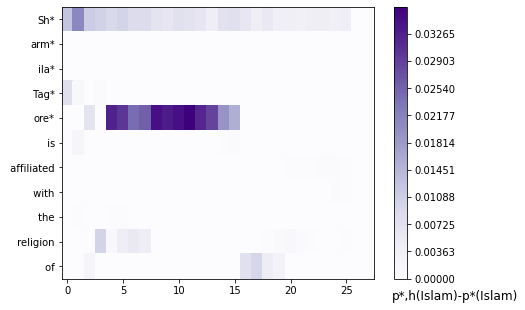

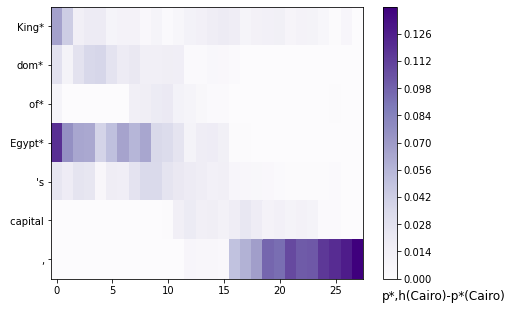

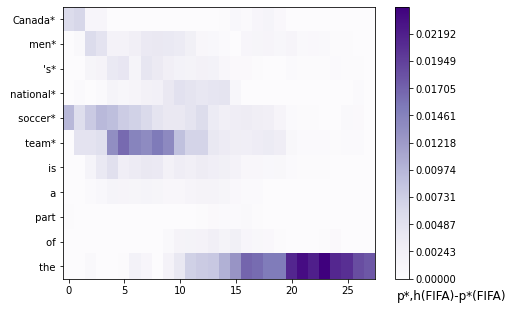

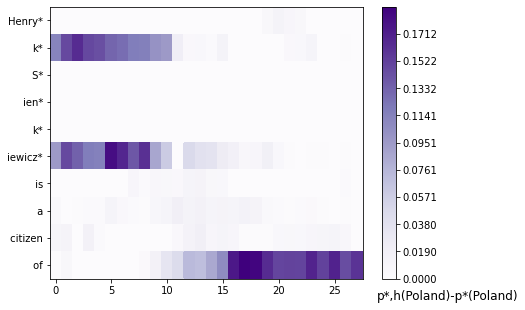

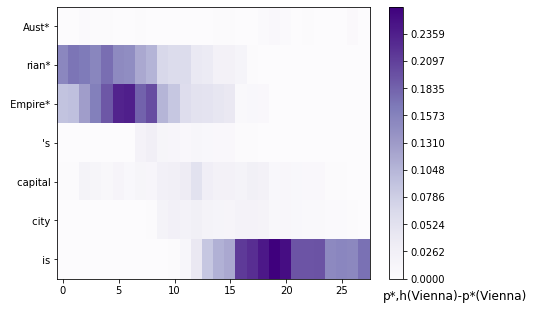

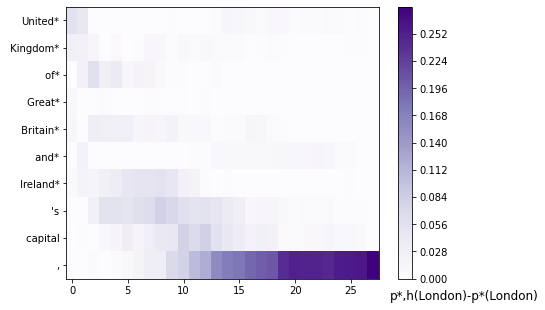

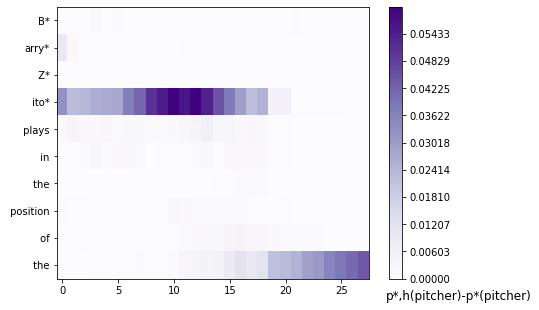

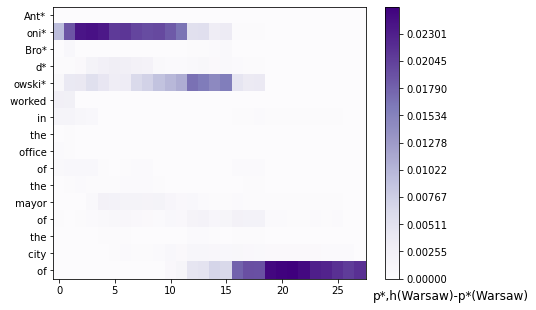

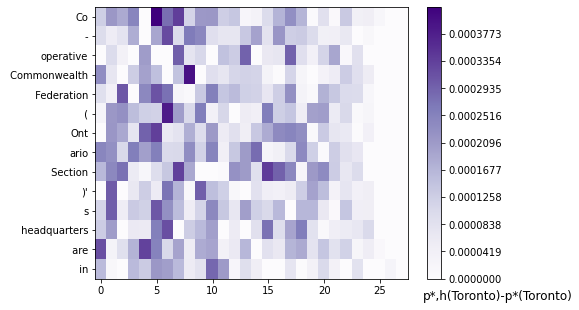

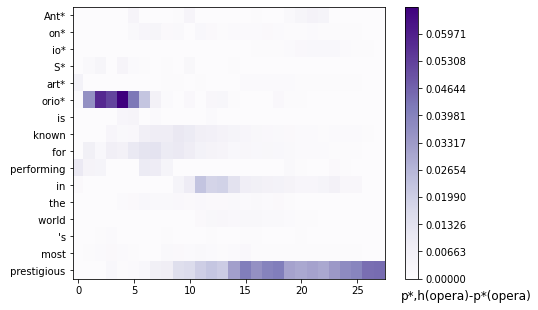

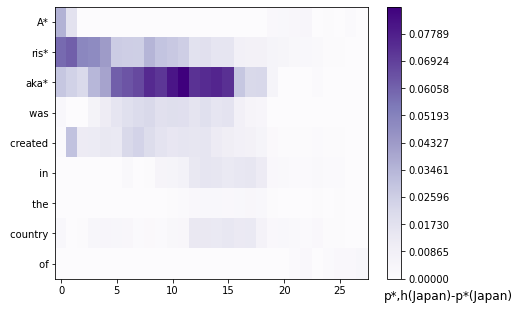

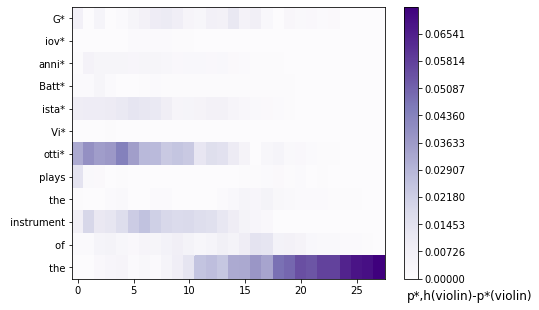

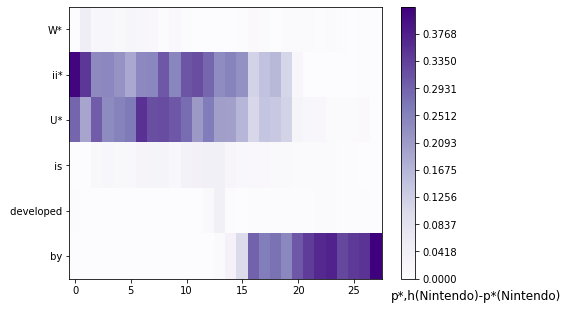

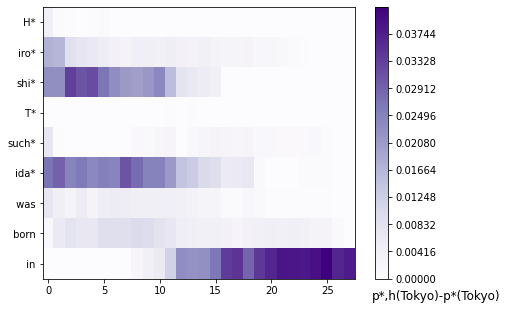

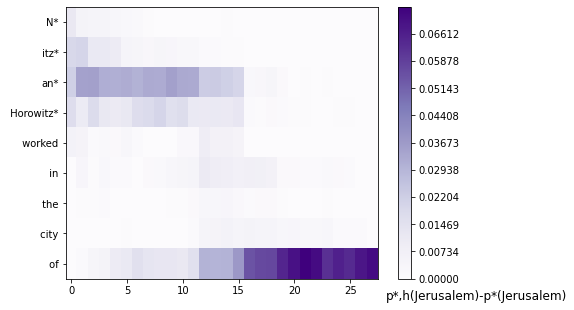

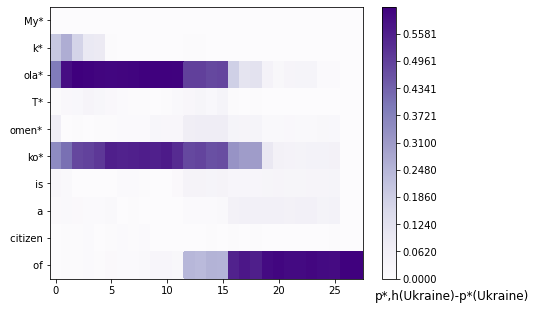

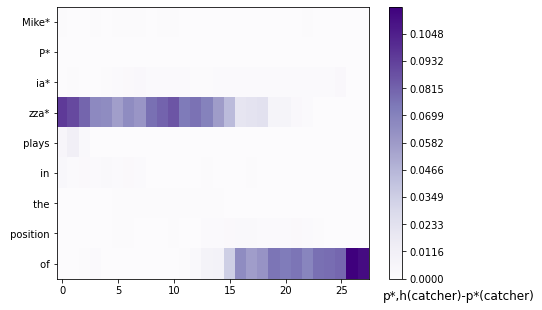

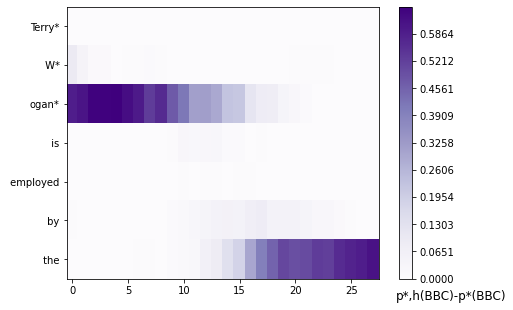

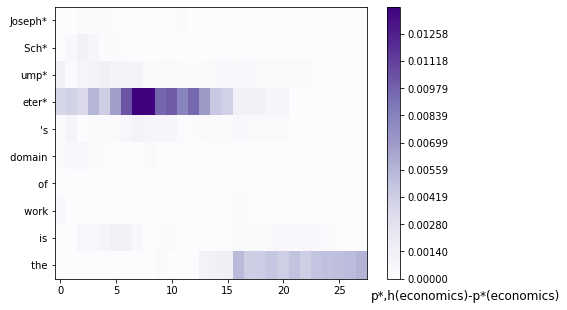

In [10]:
# zero cutoff
for prob, access in res:
    text, tkens, num_layers, _, _ = access
    x = num_layers
    y = tkens
    lower_bound = 0
    upper_bound = torch.max(prob).item()
    incr = (upper_bound - lower_bound) / 10000
    title = "p*,h("+text.split()[-1]+")"+"-"+"p*("+text.split()[-1]+")"
    color_schema = "Purples"
    
    utility.plot_results(prob, x, y, lower_bound, upper_bound, incr, title, color_schema)